<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [131]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')

In [2]:
past.head(2)

product_id       user_id  NumOfEventsInJourney  NumSessions  \
0     5866936  5.618978e+08              1.333333     1.333333   
1     5647110  5.326529e+08              2.250000     1.500000   

   interactionTime  maxPrice  minPrice  NumCart   NumView  NumRemove  ...  \
0           5550.0     15.84    15.840     0.00  1.333333       0.00  ...   
1          27556.5      5.80     5.565     1.25  0.250000       0.25  ...   

    Dec  Afternoon  Dawn  EarlyMorning   Evening  Morning  Night  Purchased?  \
0  0.00       0.00   0.0      0.666667  0.333333      0.0    0.0           0   
1  0.25       0.75   0.0      0.000000  0.250000      0.0    0.0           0   

   Noon  Category  
0   0.0       1.0  
1   0.0       1.0  

[2 rows x 37 columns]

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [3]:
# YOUR CODE HERE
print('The percentage of customers that purchased is {}%'.format(past['Purchased?'].mean()*100))

The percentage of customers that purchased is 34.38%


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [132]:
# YOUR CODE HERE
X = past.drop(['product_id','user_id'], axis=1)
# YOUR CODE HERE
y = X.pop('Purchased?')

In [5]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [6]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data for PCA
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=5, whiten=True)
X_reduced = pca.fit_transform(X_scaled)

In [7]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [8]:
# YOUR CODE HERE
pca.explained_variance_ratio_

array([0.10282257, 0.09445762, 0.06516139, 0.05095958, 0.04197019])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [9]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [10]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

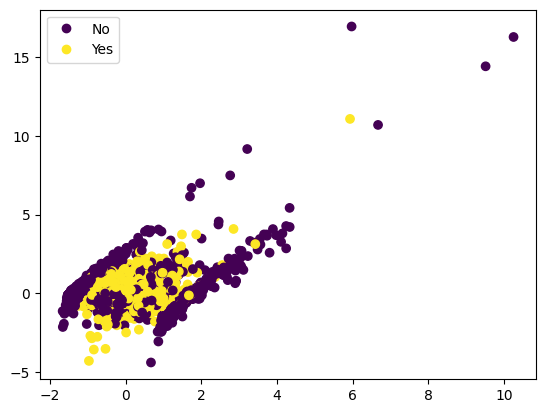

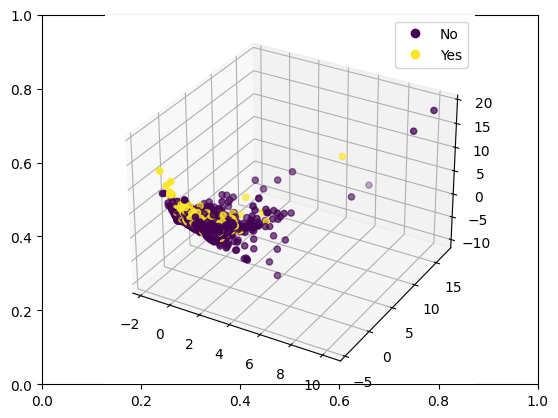

In [11]:
# YOUR CODE HERE
visualize_2pcs(X_reduced, y)
# YOUR CODE HERE
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [12]:
# YOUR CODE HERE (imports!)
from distutils.log import Log
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    if standardize:
        pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
    else:
        pipe = make_pipeline(LogisticRegression(class_weight='balanced'))

    # fit the pipeline
    pipe.fit(X_train, y_train)

    # test data predictions
    y_pred = pipe.predict(X_test)

    # classification report
    target_names = ['Did not purchase','Purchased']
    
    return print(classification_report(y_test, y_pred, target_names=target_names))

Now apply the pipeline on the all the features `X` and review the performance

In [13]:
# YOUR CODE HERE
train(X, y, standardize=True)

                  precision    recall  f1-score   support

Did not purchase       0.75      0.77      0.76       649
       Purchased       0.55      0.52      0.54       351

        accuracy                           0.68      1000
       macro avg       0.65      0.65      0.65      1000
    weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [14]:
# YOUR CODE HERE
train(X_reduced, y, standardize=True)

                  precision    recall  f1-score   support

Did not purchase       0.73      0.71      0.72       649
       Purchased       0.49      0.53      0.51       351

        accuracy                           0.64      1000
       macro avg       0.61      0.62      0.61      1000
    weighted avg       0.65      0.64      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*
    * The reduced feature set performed a little under in all metrics vs. all 34 features, but not that far off. So those 5 reduced features captured a good part of the variance.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [15]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [16]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        # YOUR CODE HERE
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

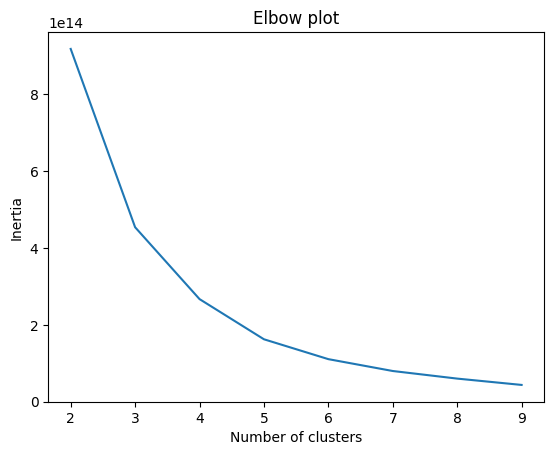

In [17]:
# YOUR CODE HERE
ks = np.arange(2,10)
visualize_elbow(X, ks)

4. What are the disadvantage to use the Elbow method?

    *YOUR ANSWER HERE* Computational cost and subjectivity in interpretation of optimal number of clusters

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [18]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.19391257131638237
For n_clusters = 3 The average silhouette_score is : 0.20688850228975142
For n_clusters = 4 The average silhouette_score is : 0.21541192197600445
For n_clusters = 5 The average silhouette_score is : 0.2213997385180648
For n_clusters = 6 The average silhouette_score is : 0.22839854752882074
For n_clusters = 7 The average silhouette_score is : 0.22059154589685603
For n_clusters = 8 The average silhouette_score is : 0.22712806154436752


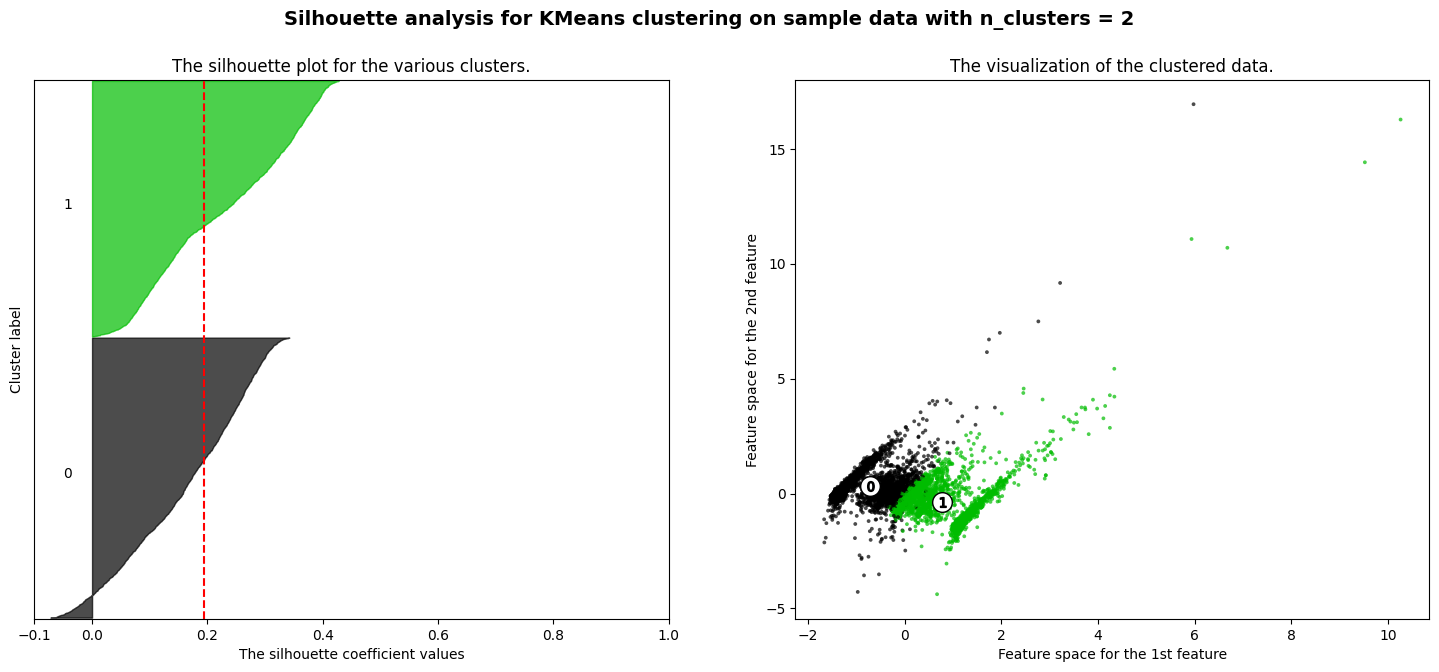

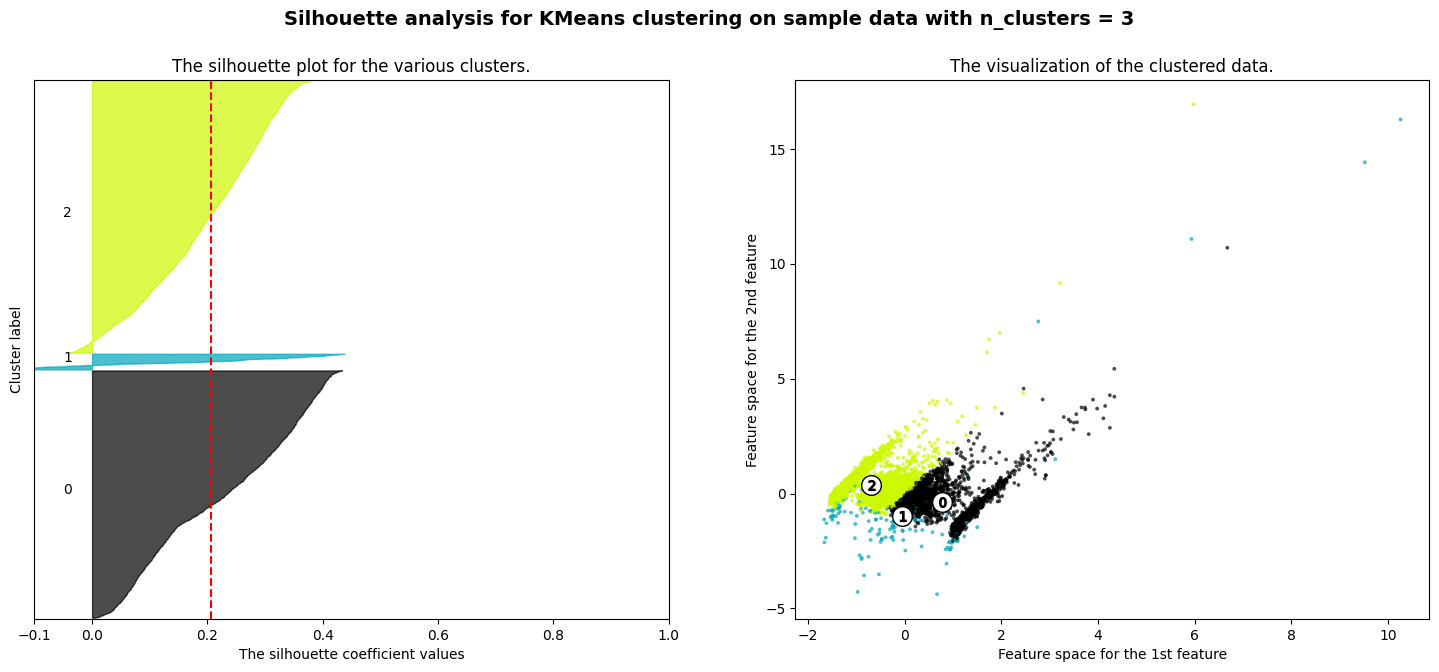

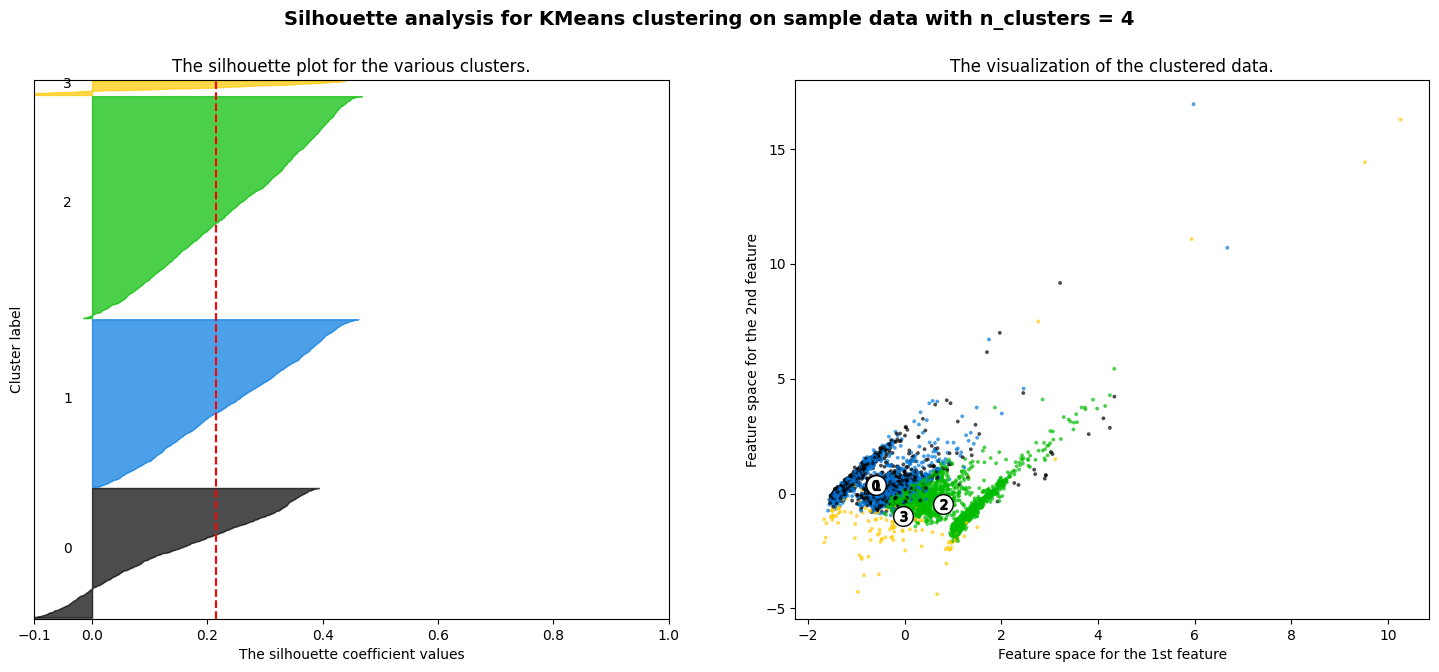

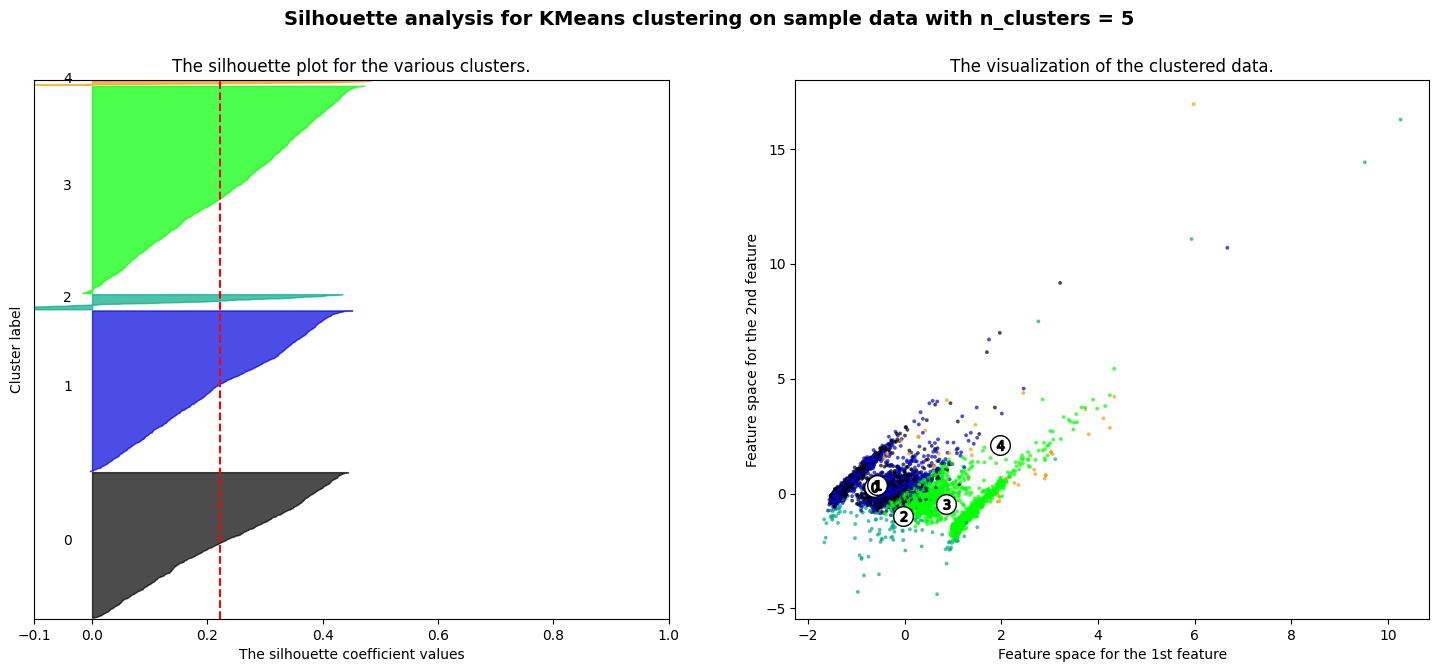

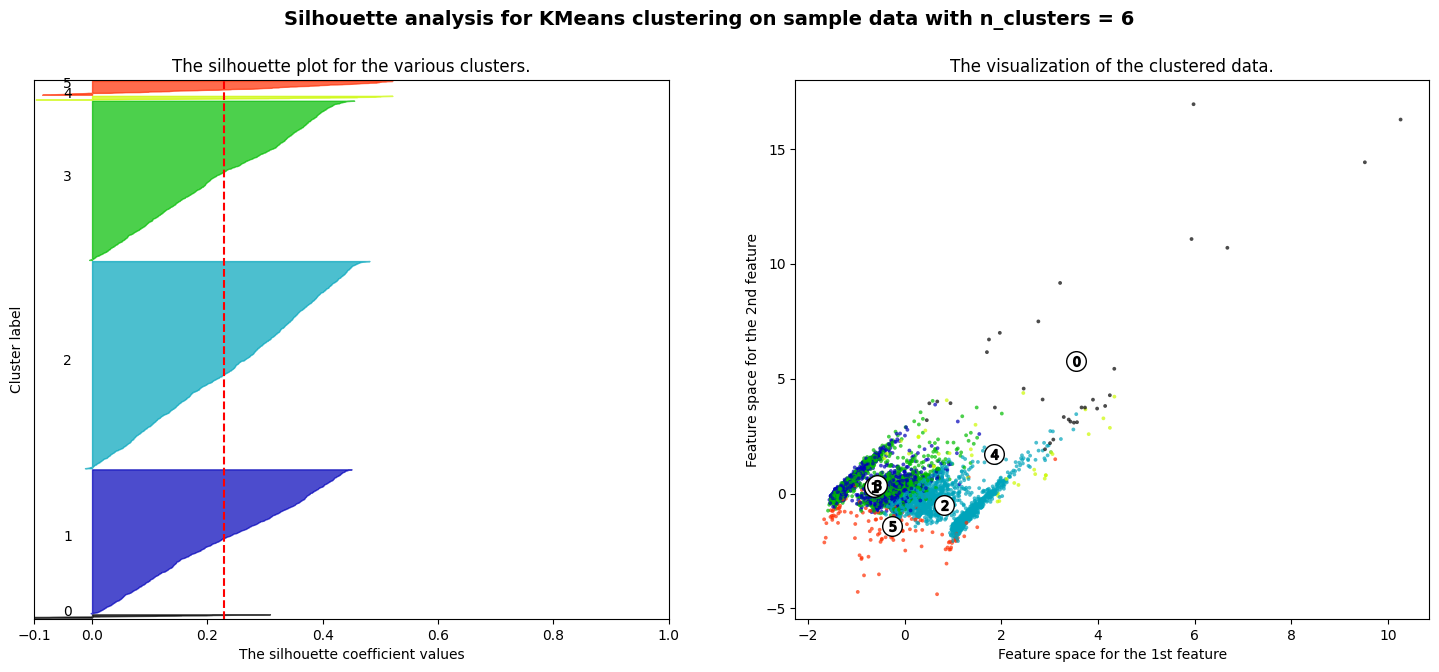

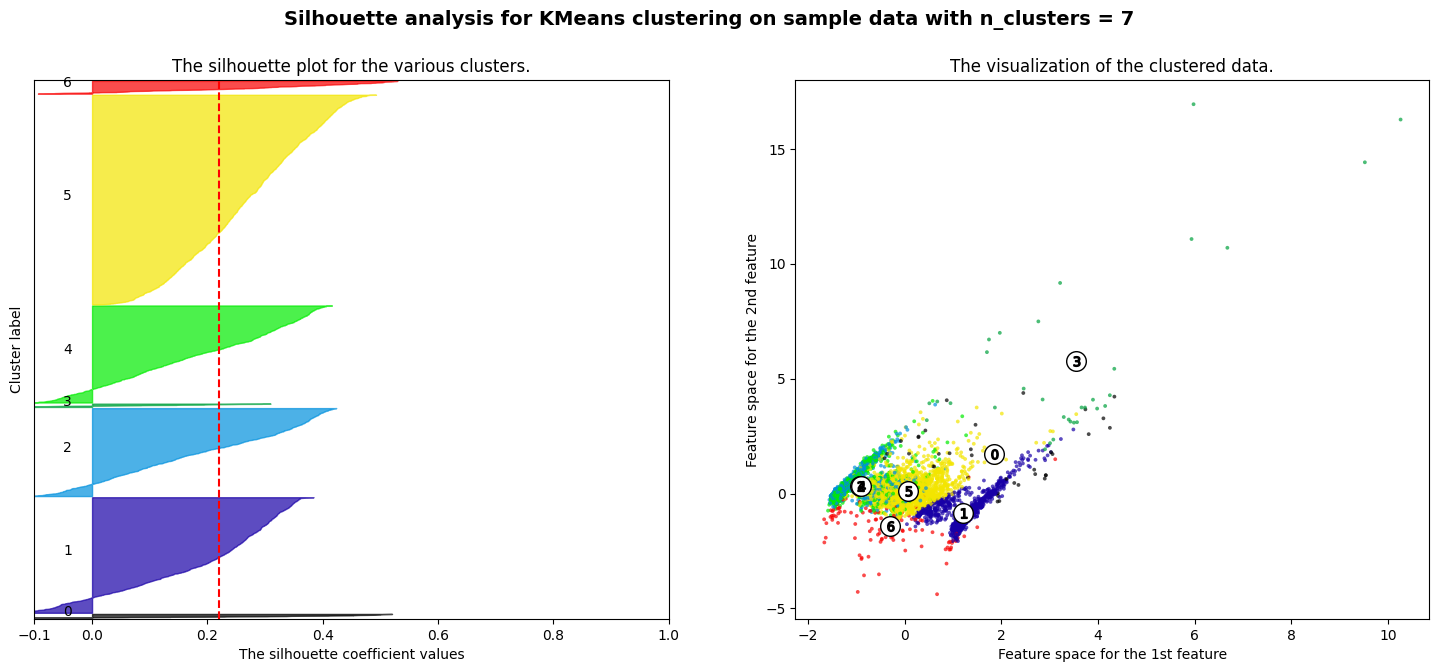

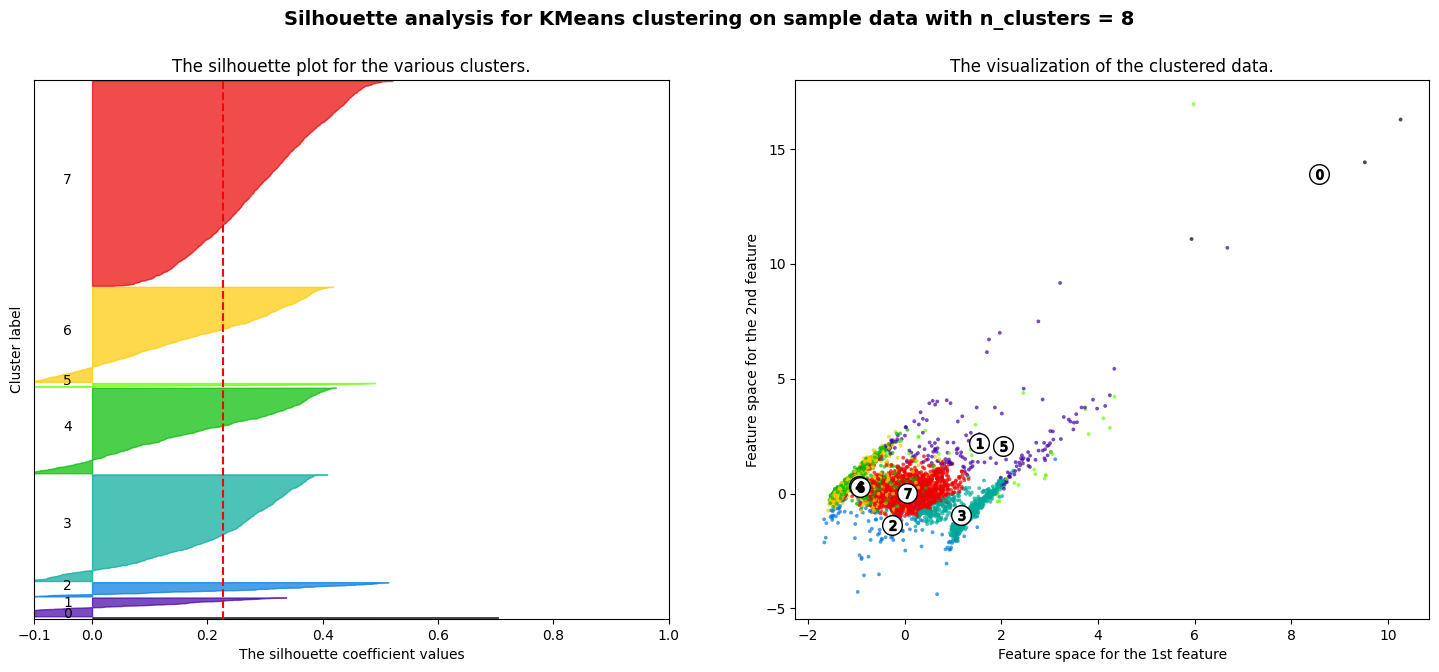

In [19]:
# YOUR CODE HERE
visualize_silhouette(8, X_reduced, 10)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [31]:
# YOUR CODE HERE
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=10).fit(X_reduced)

7. What is the size of each cluster? 

In [32]:
# YOUR CODE HERE
labels = km.labels_
counts = np.bincount(labels[labels>=0])
counts

array([1216, 1571, 2080,  133])

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [33]:
# YOUR CODE HERE
cluster_pca = pd.DataFrame(km.predict(X_reduced))
past['cluster_pca'] = cluster_pca

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [45]:
clusters = {}
for i in range(n_clusters):
    clusters['cluster_{}'.format(i)] = past[past.cluster_pca == i]

In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

    Use SweetViz for EDA and look at associations of variables with cluster_pca

                                             |          | [  0%]   00:00 -> (? left)


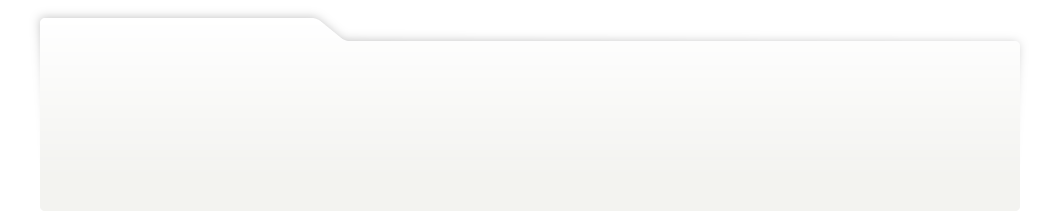
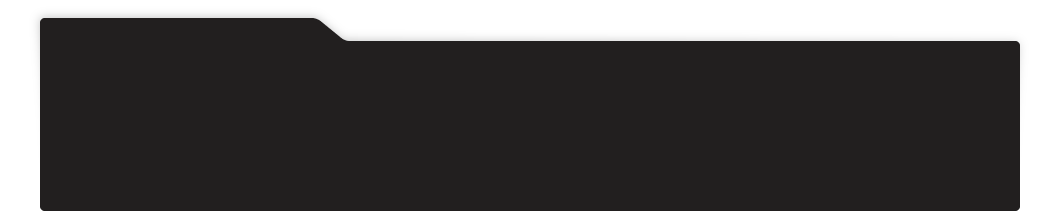
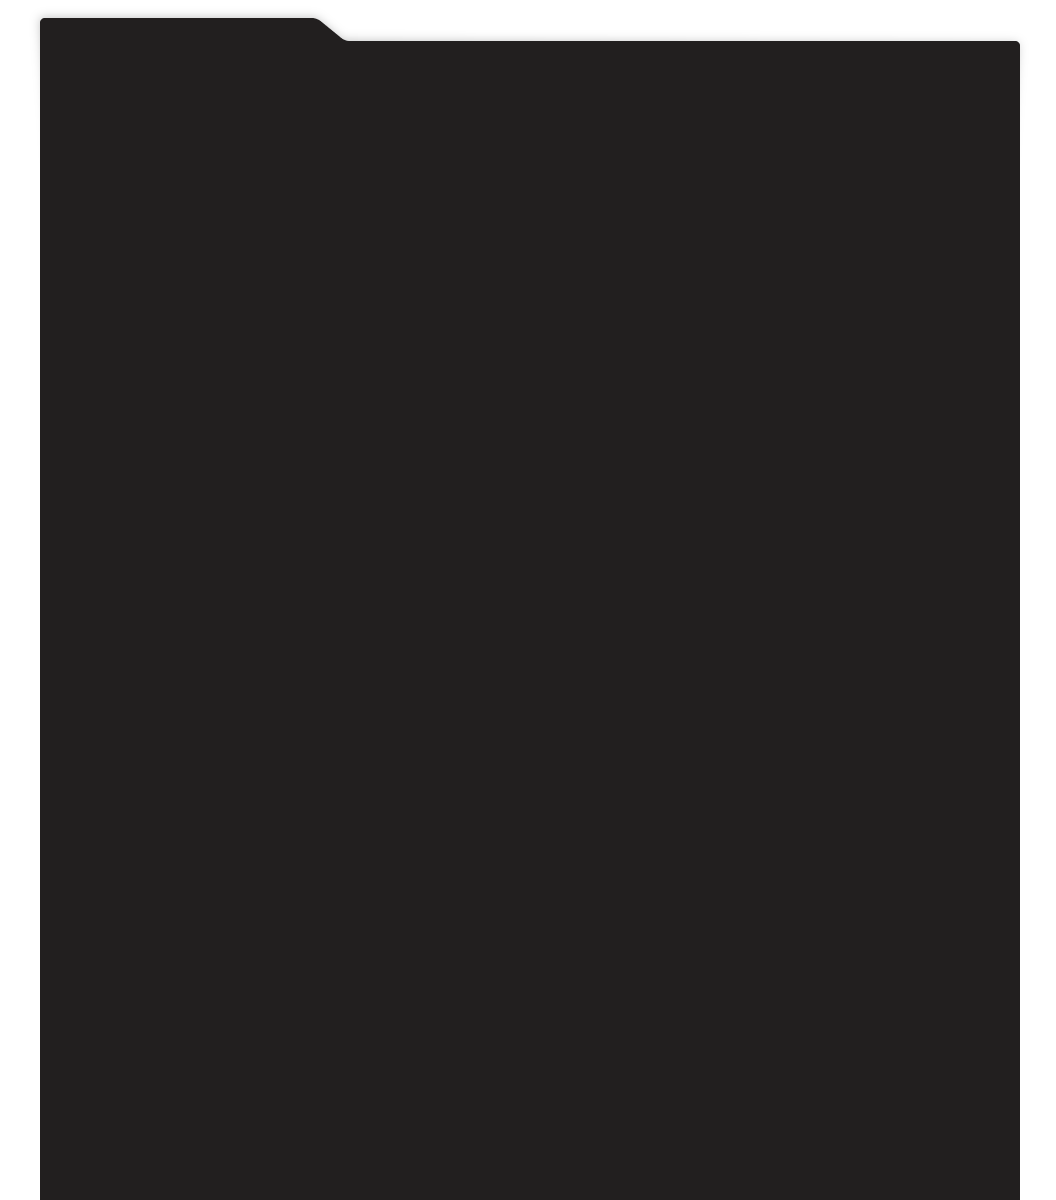
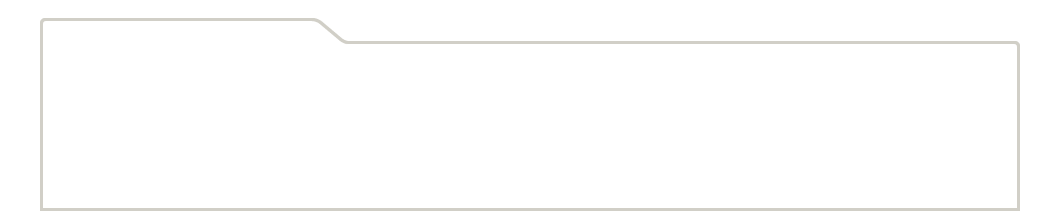
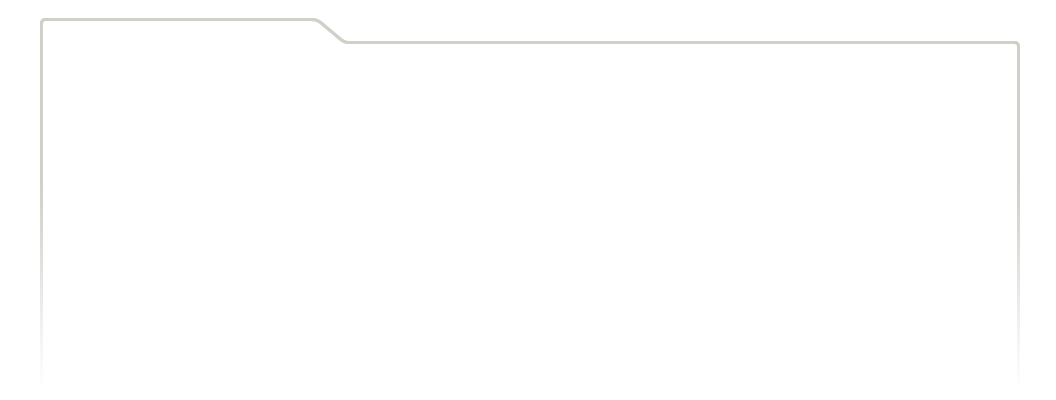
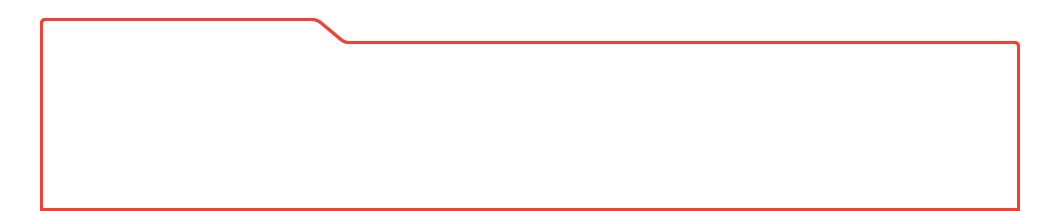
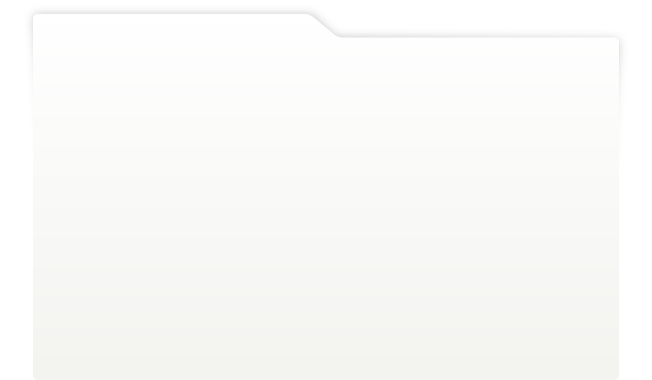
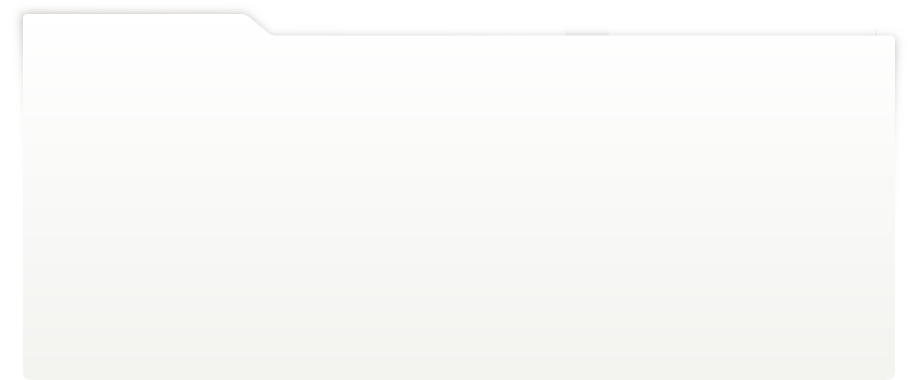
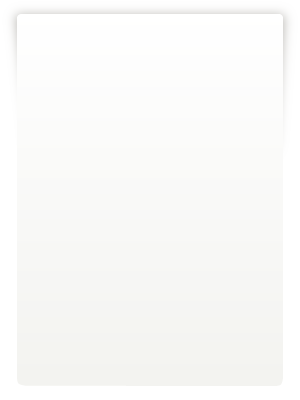
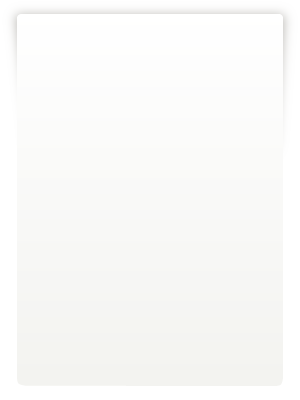
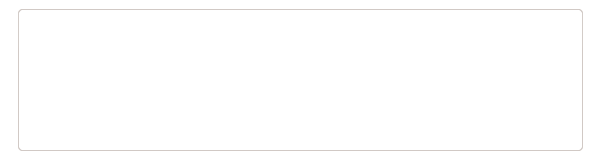
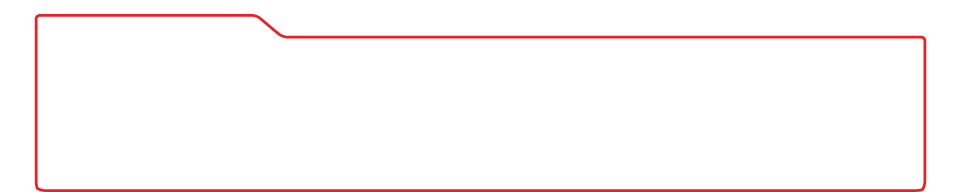
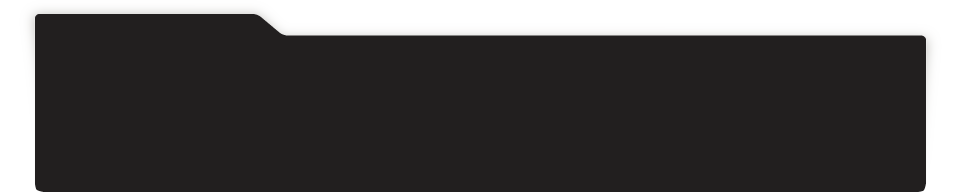
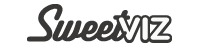
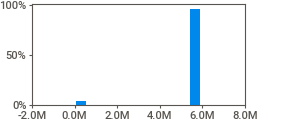
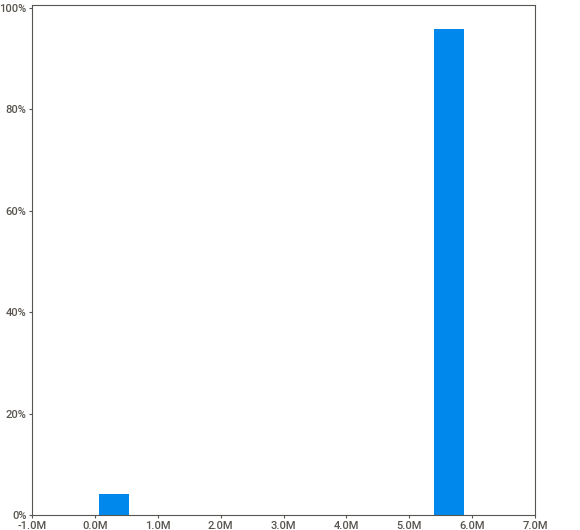
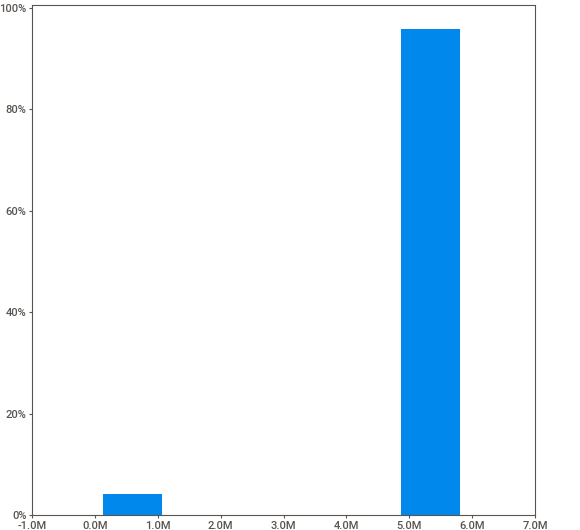
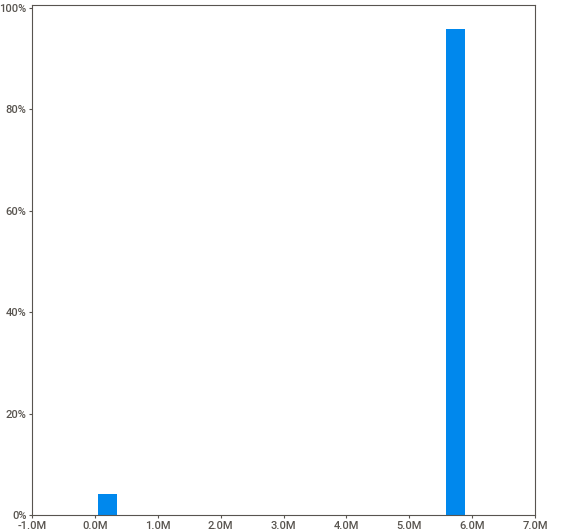
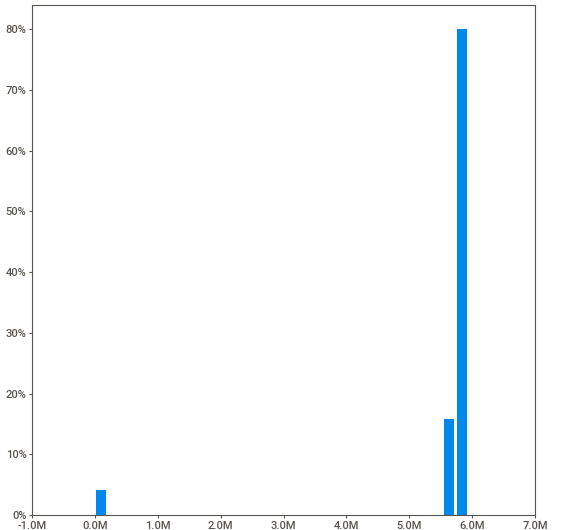
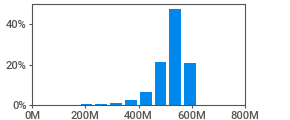
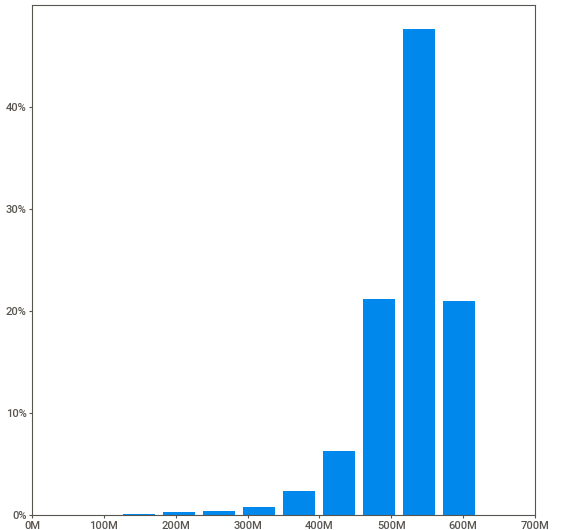
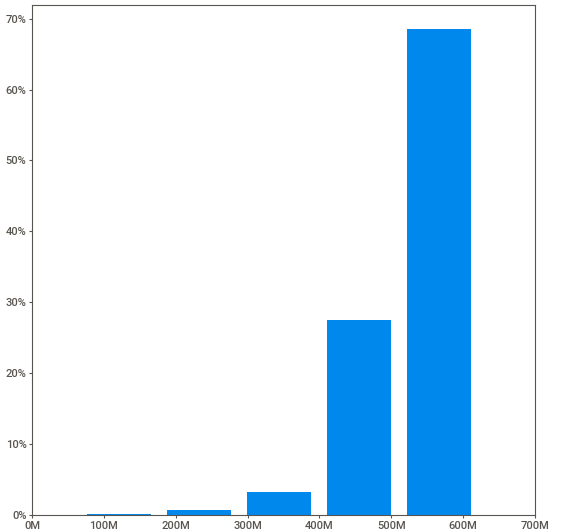
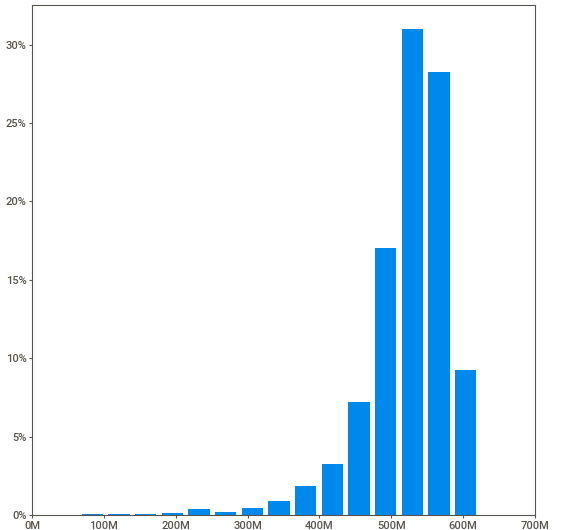
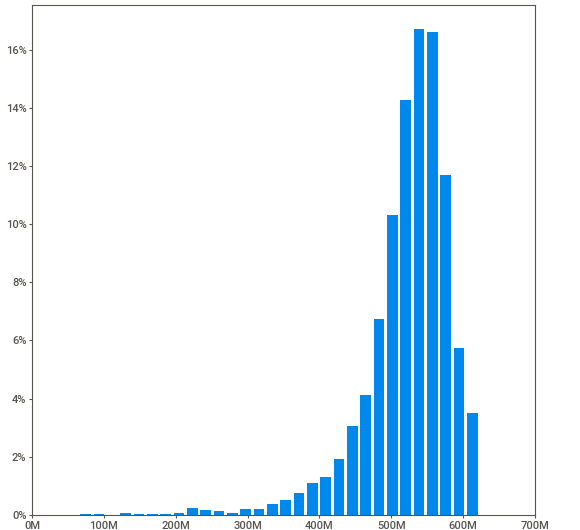
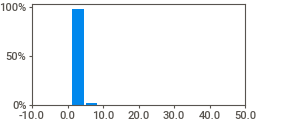
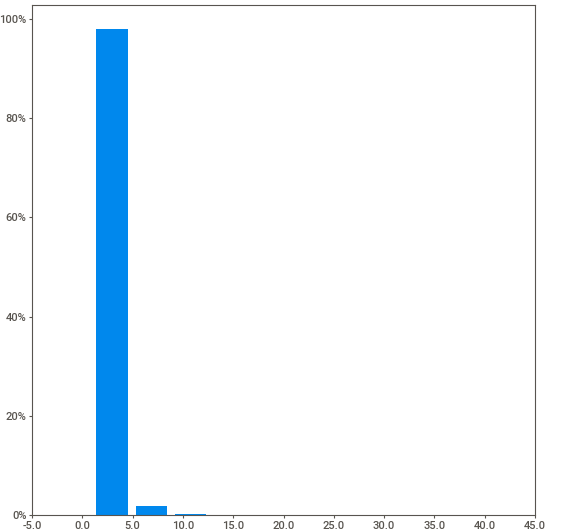
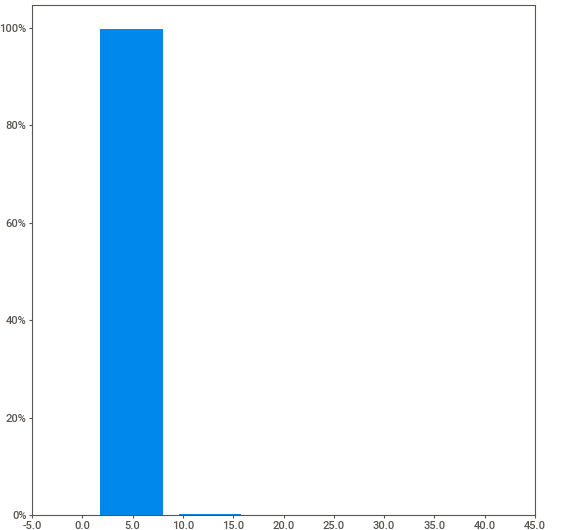
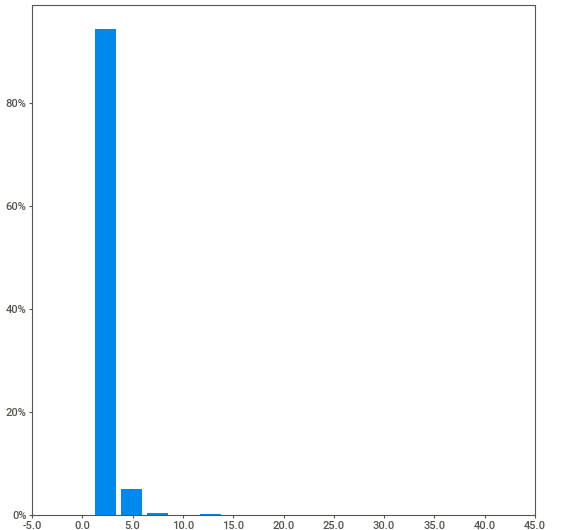
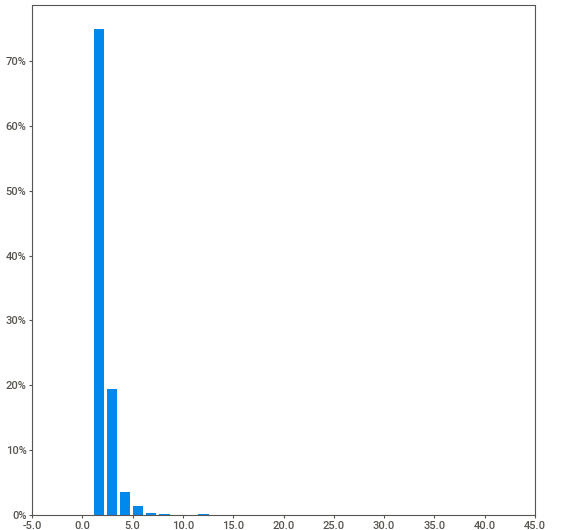
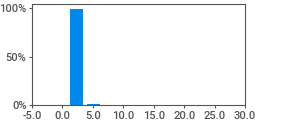
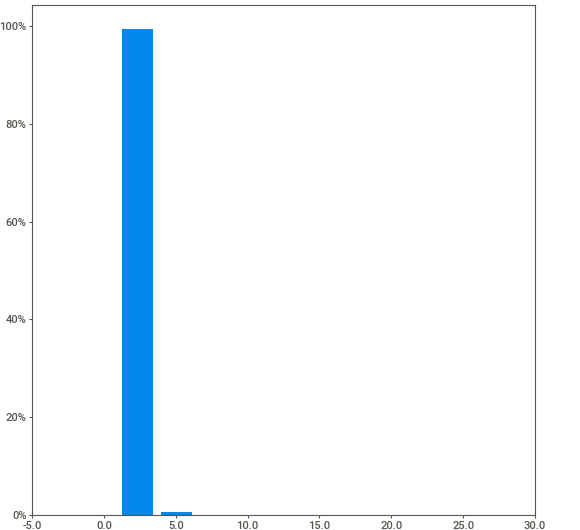
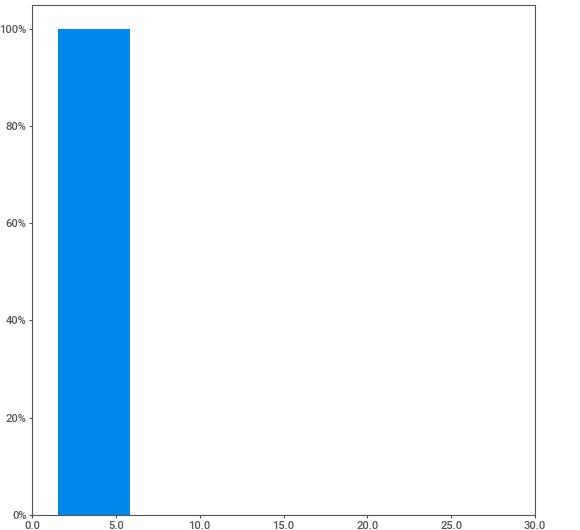
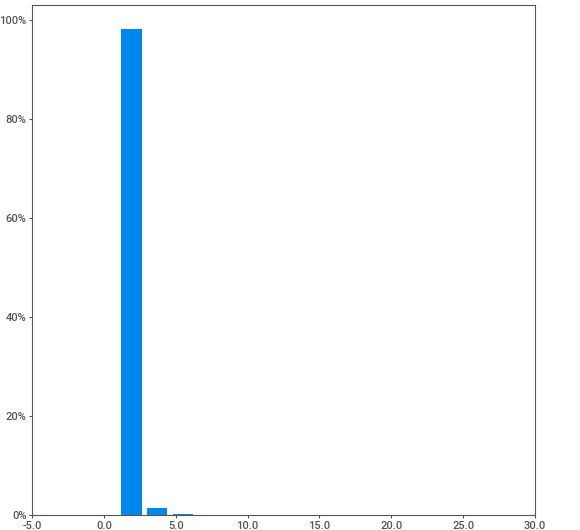
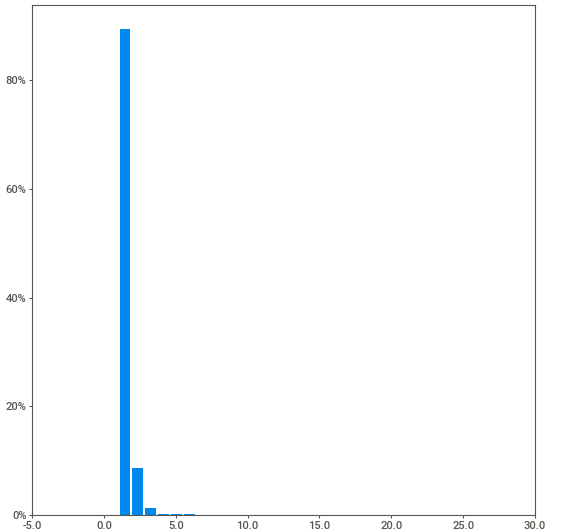
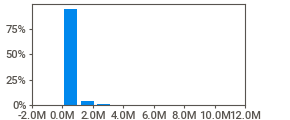
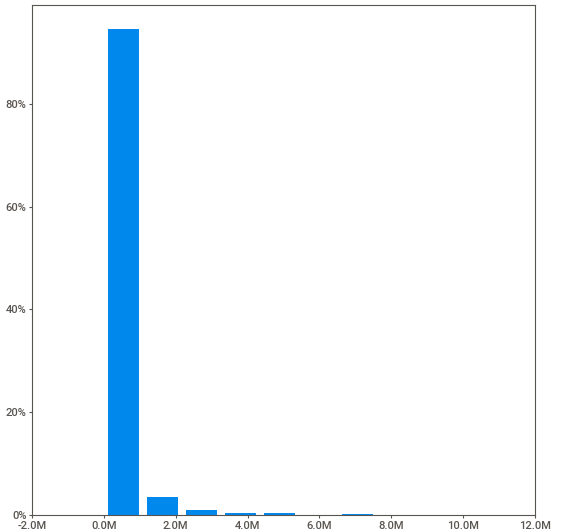
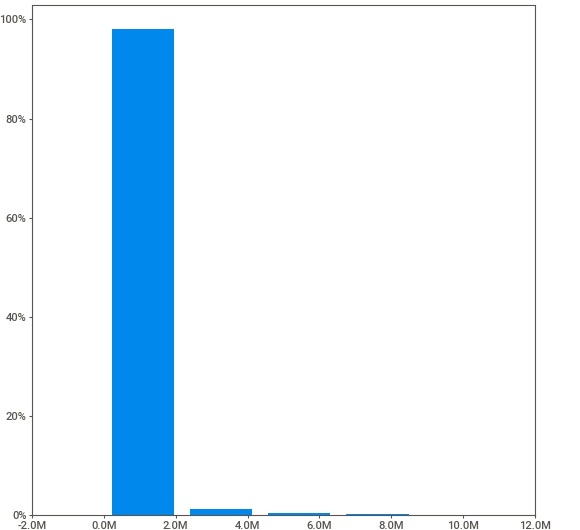
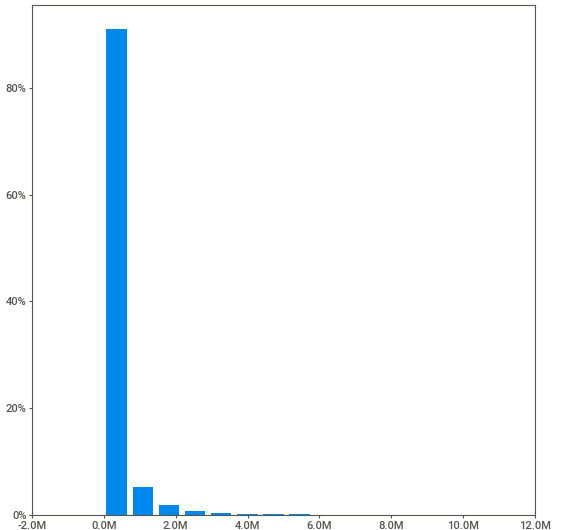
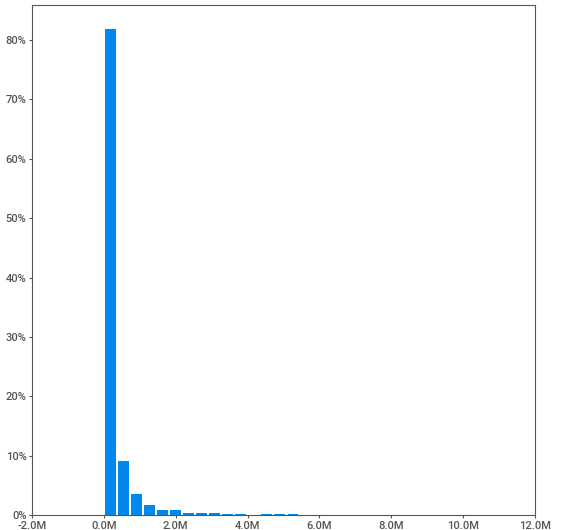
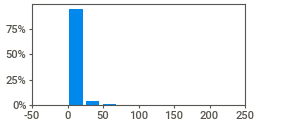
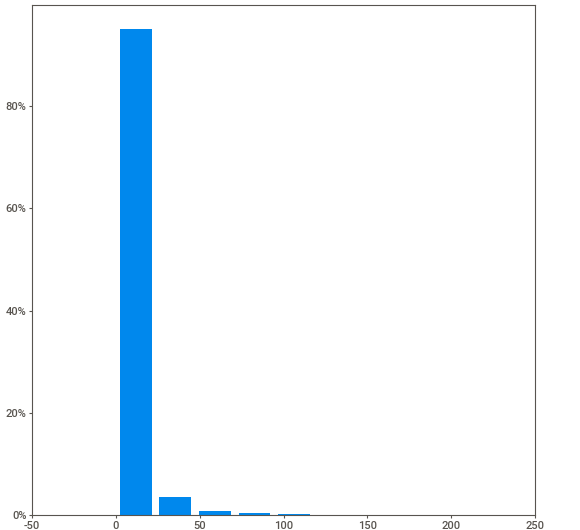
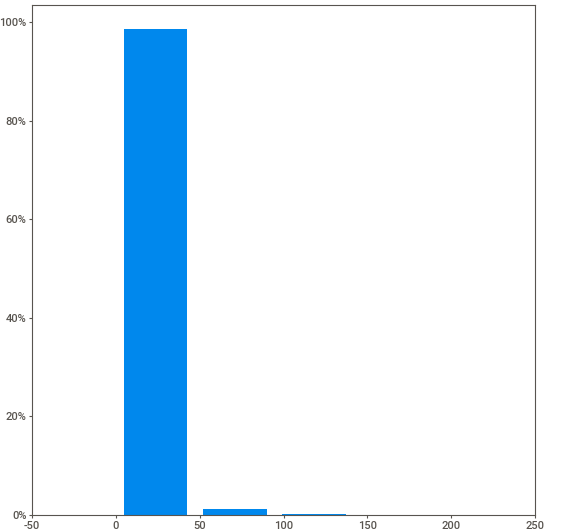
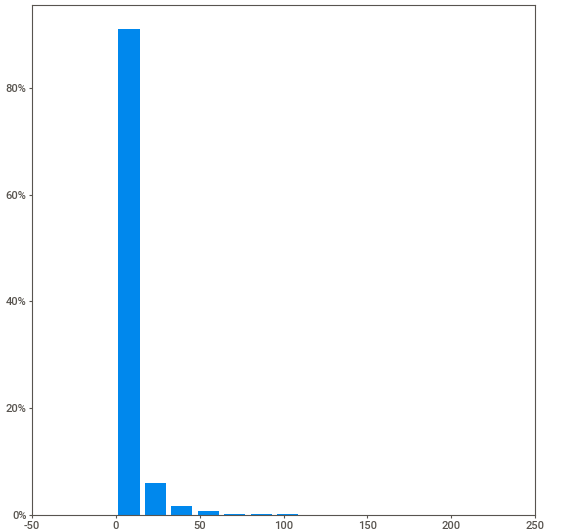
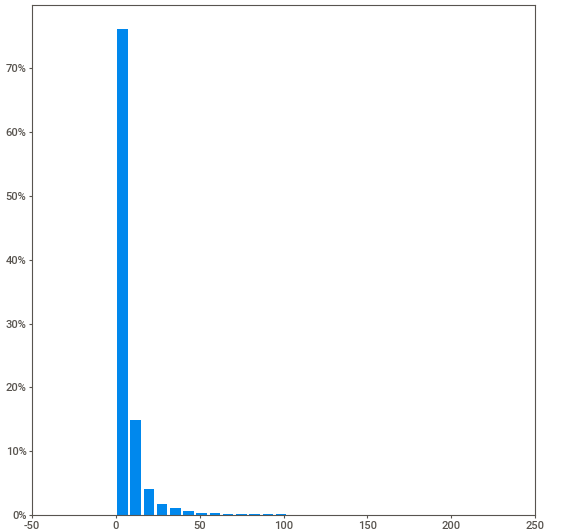
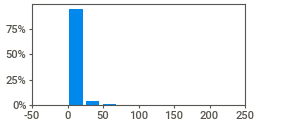
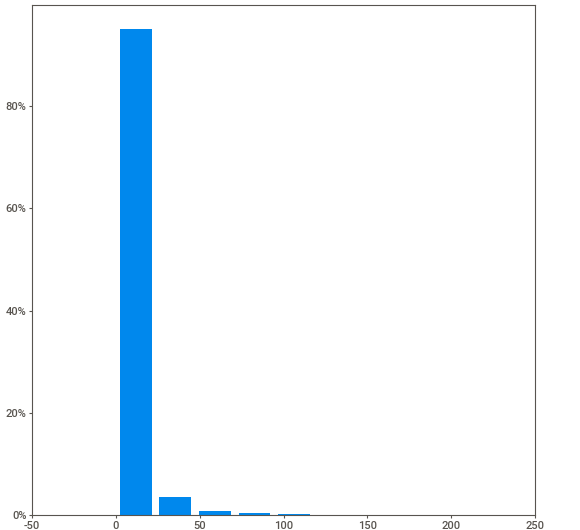
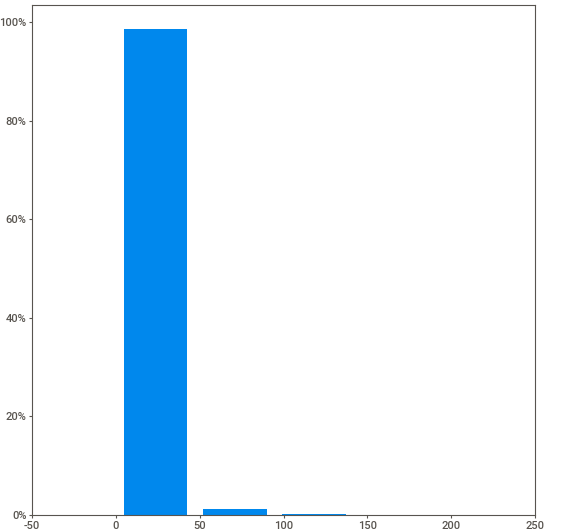
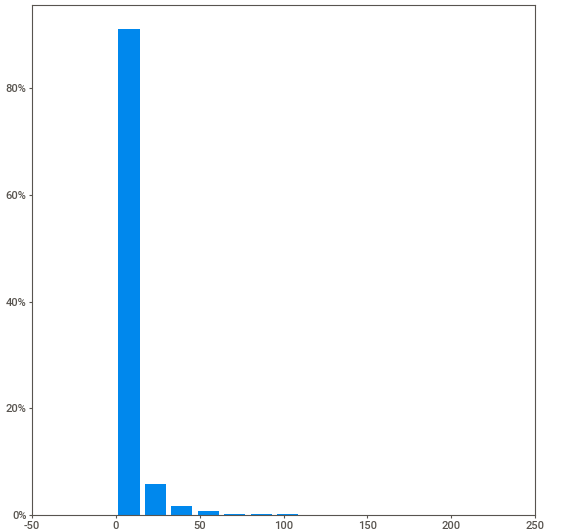
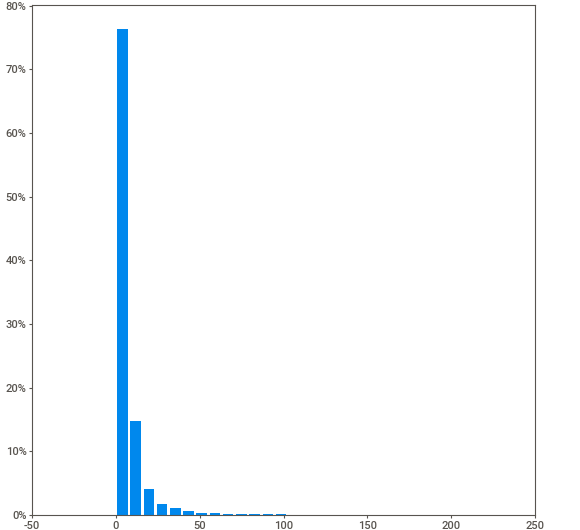
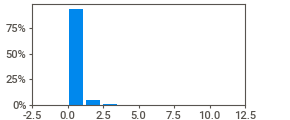
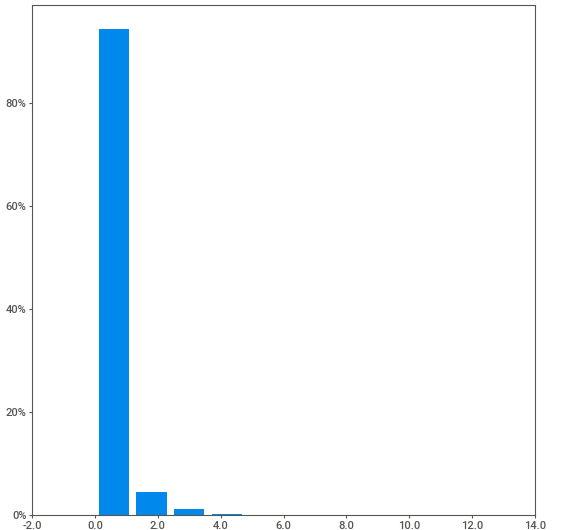
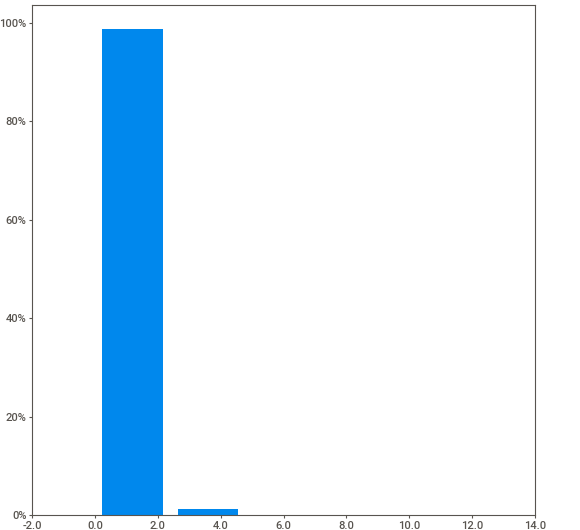
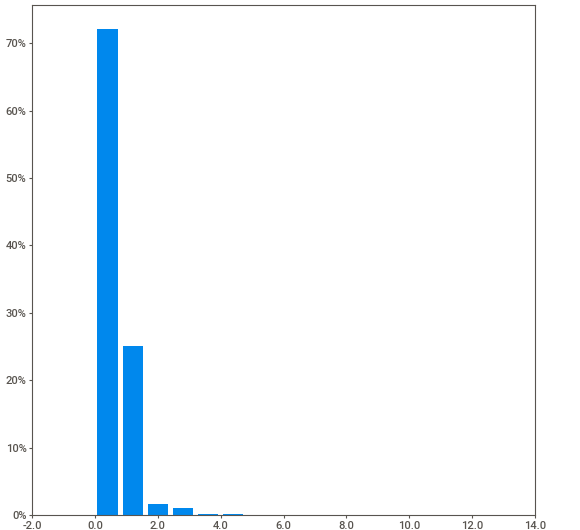
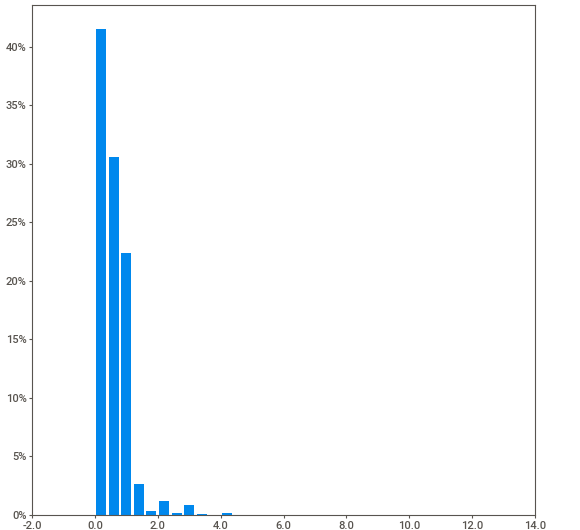
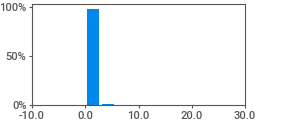
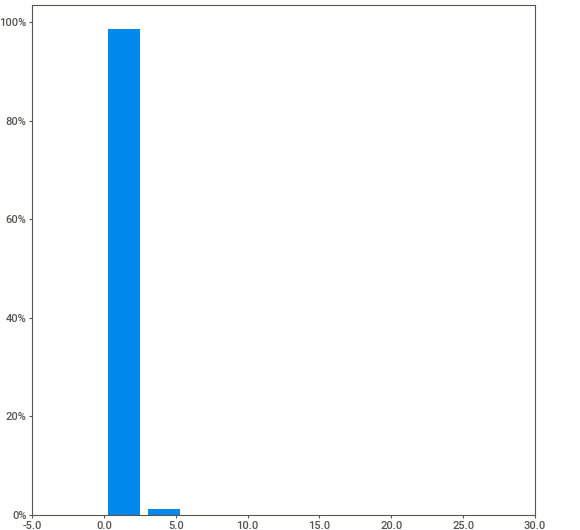
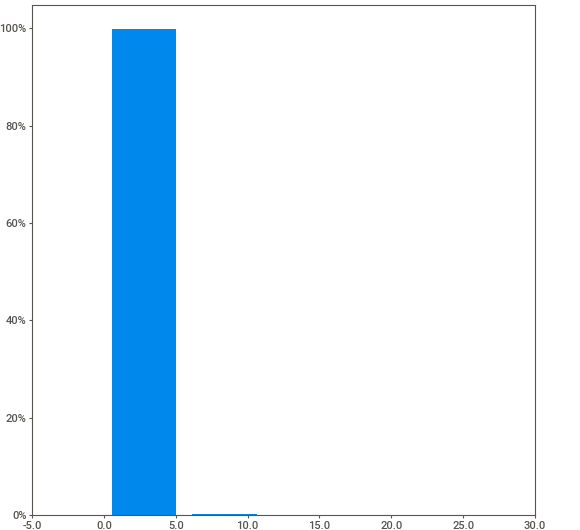
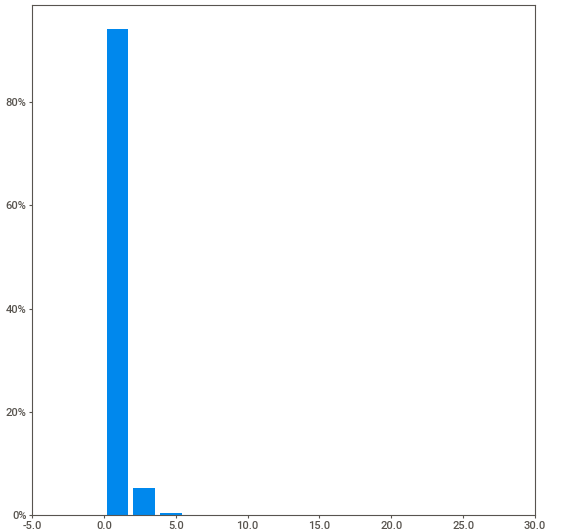
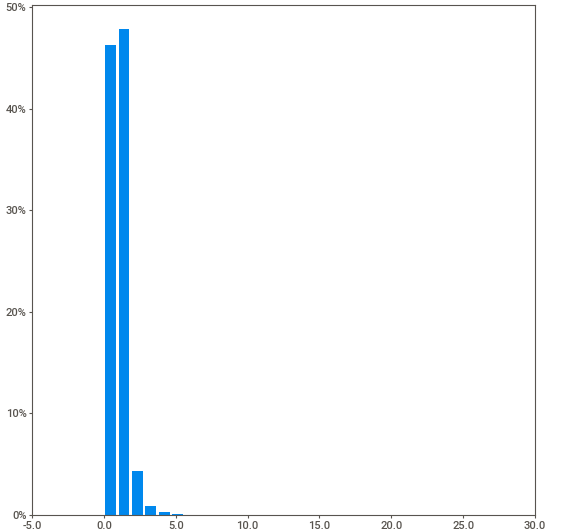
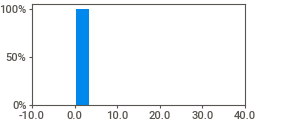
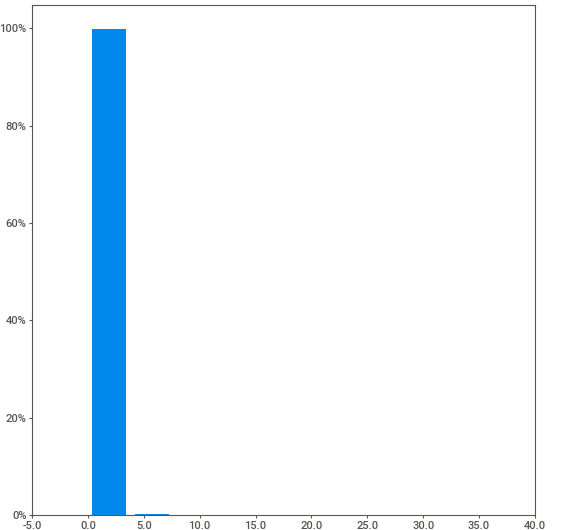
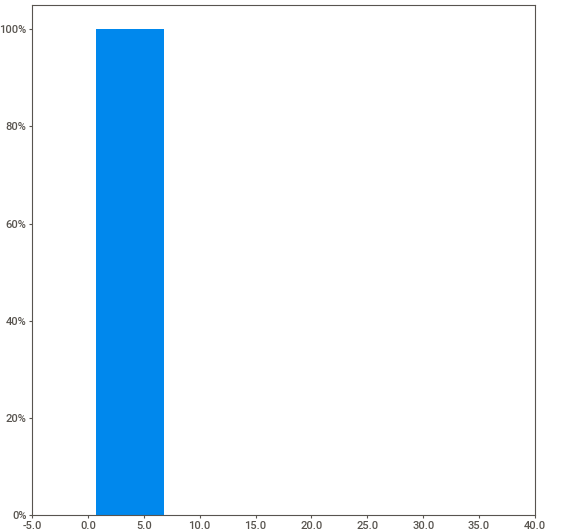
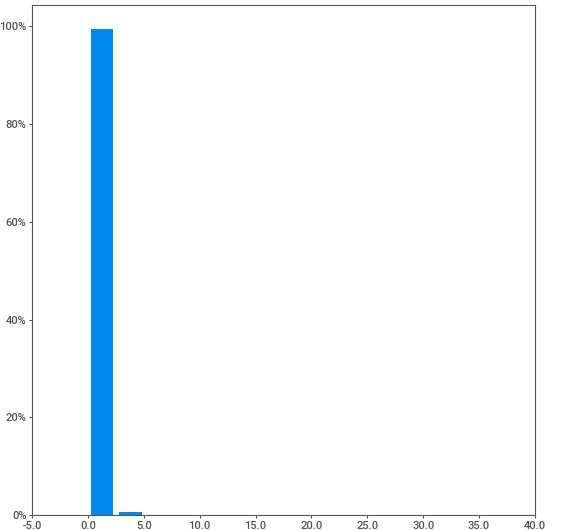
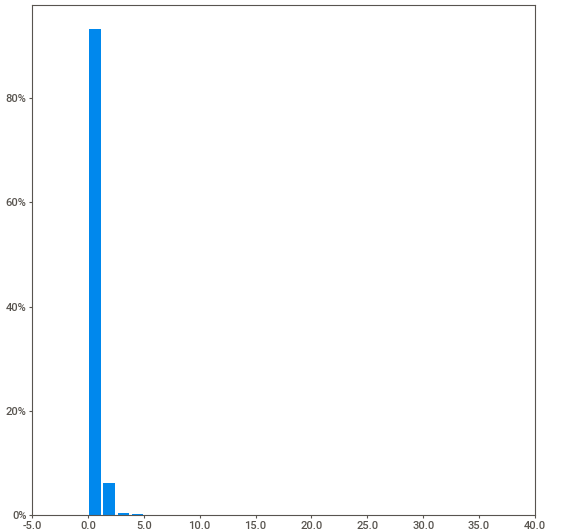
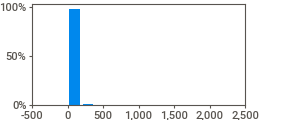
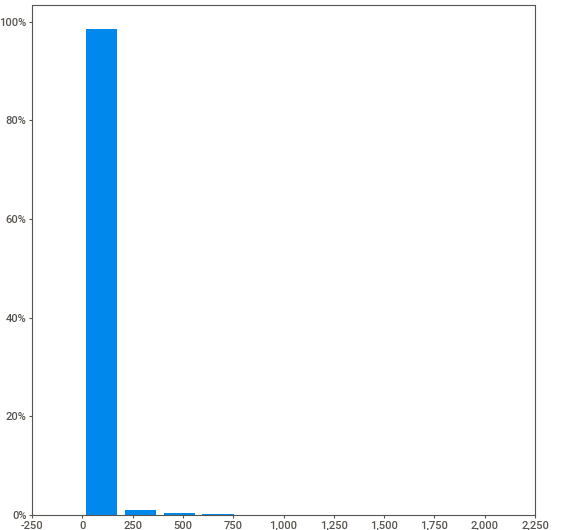
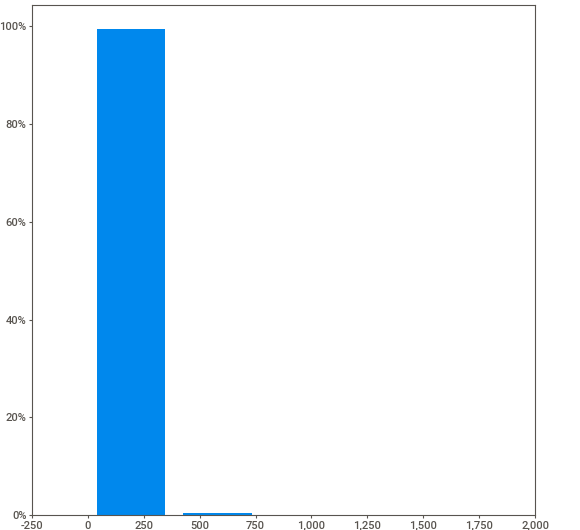
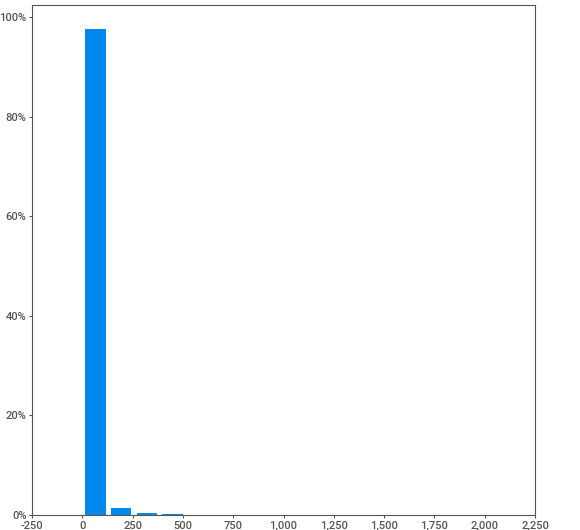
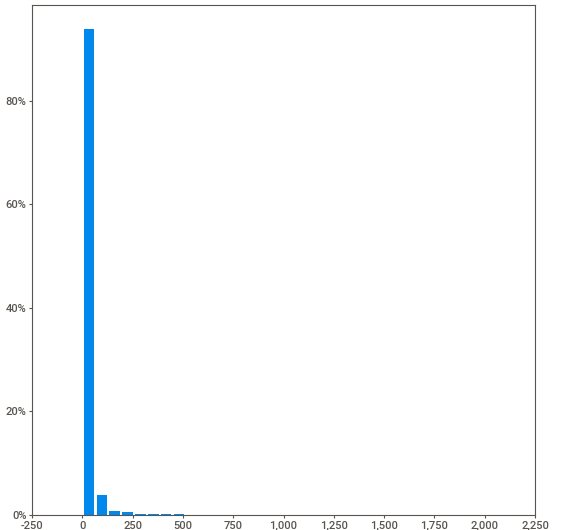
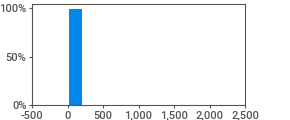
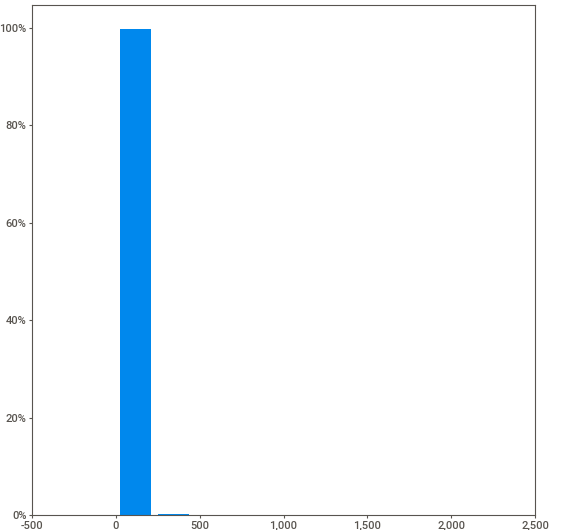
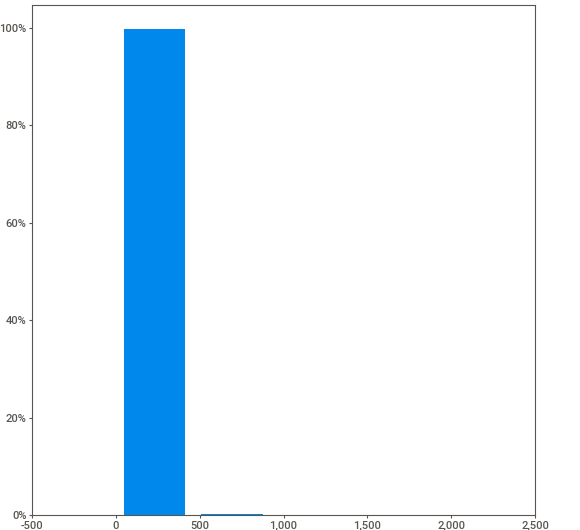
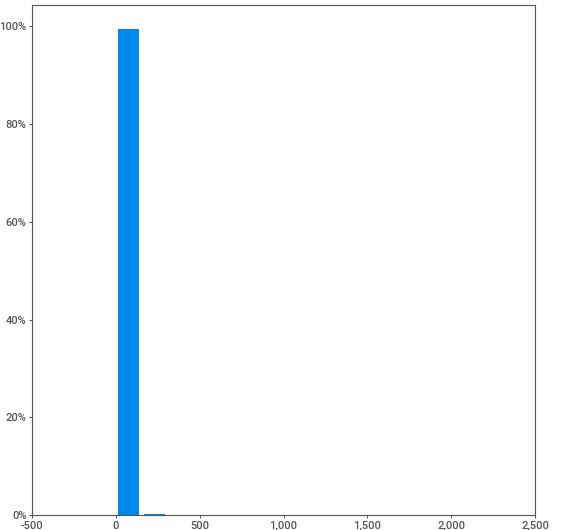
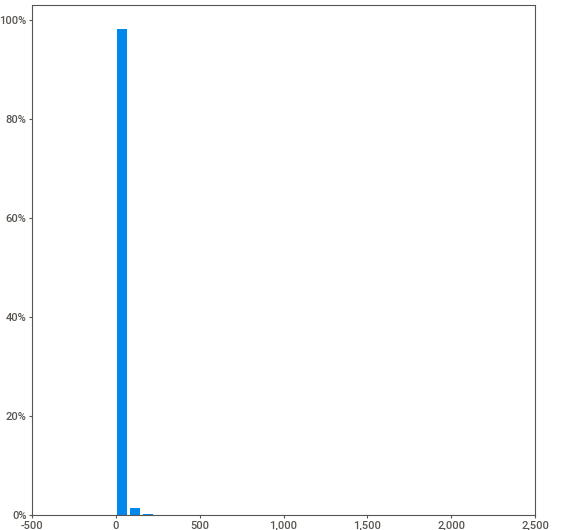
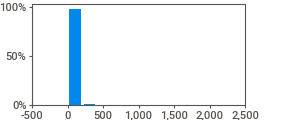
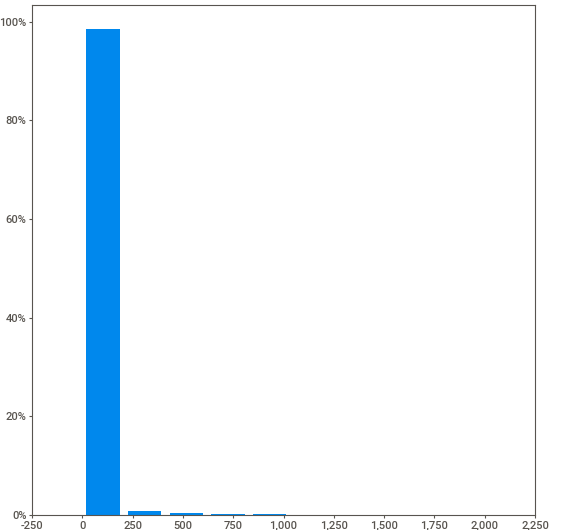
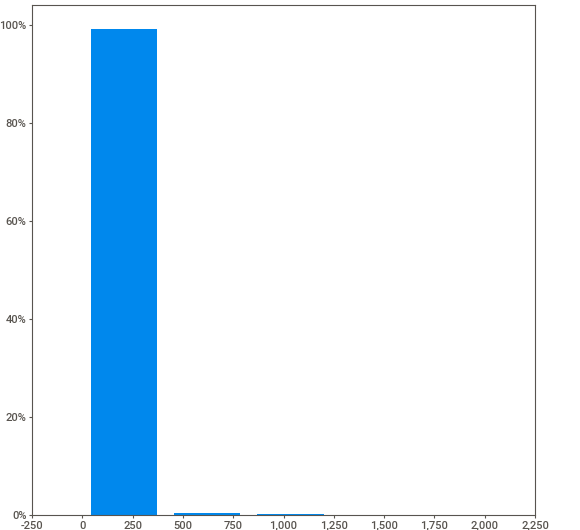
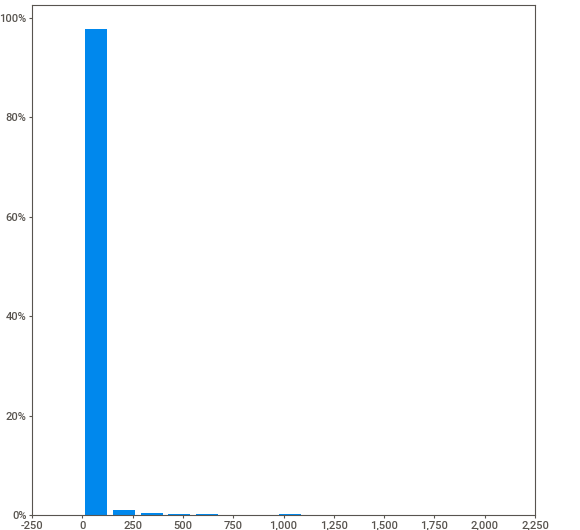
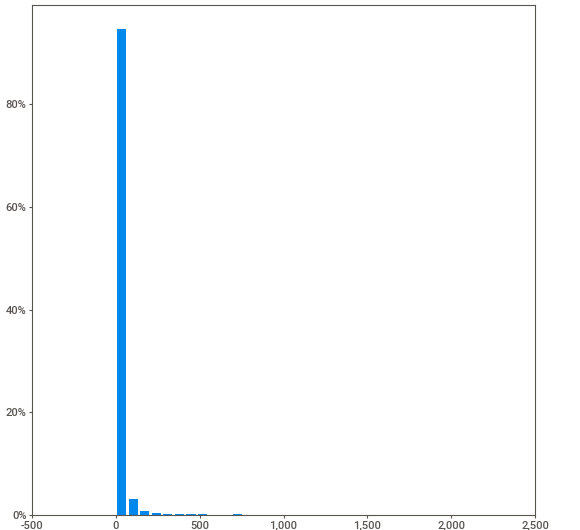
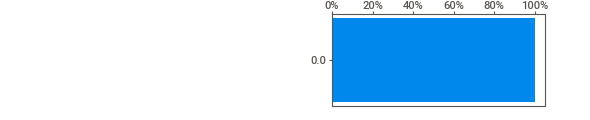
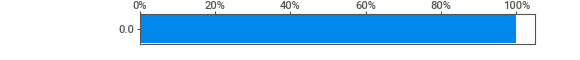
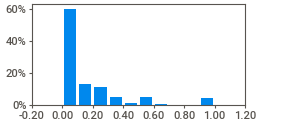
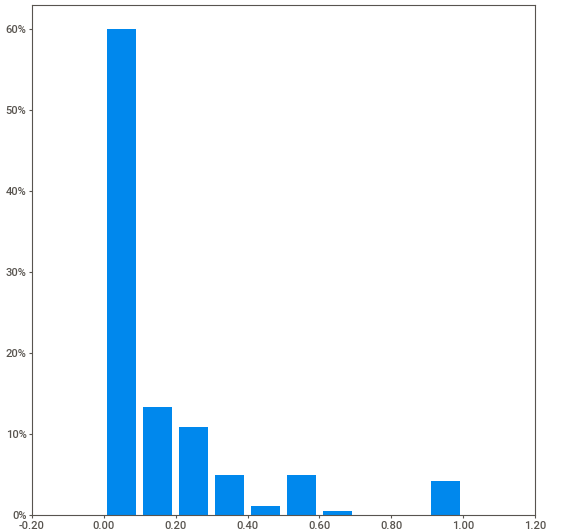
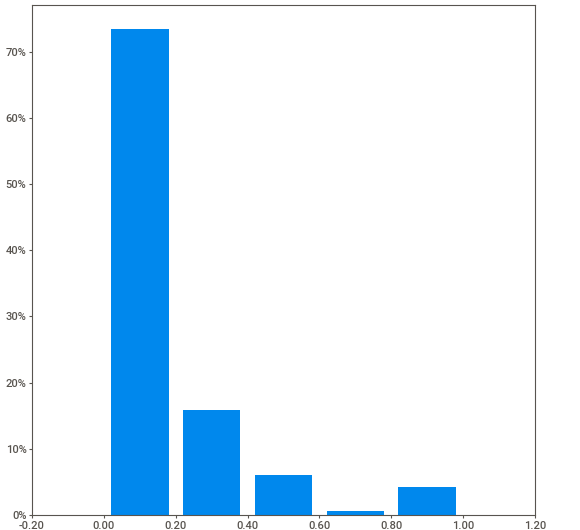
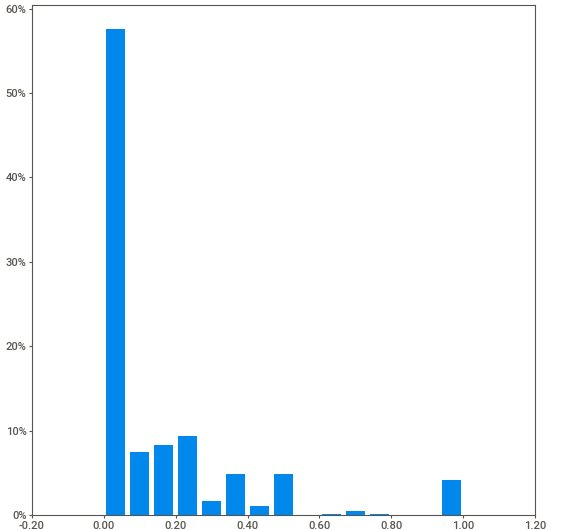
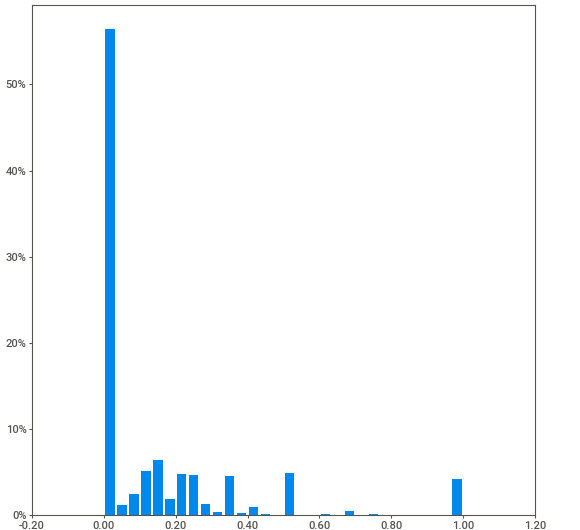
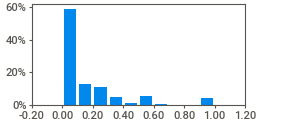
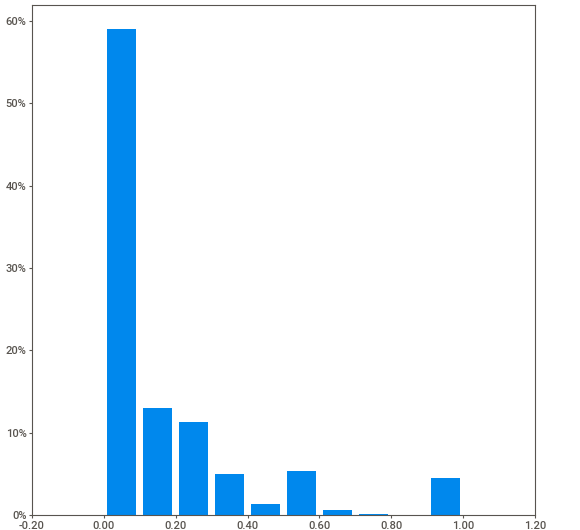
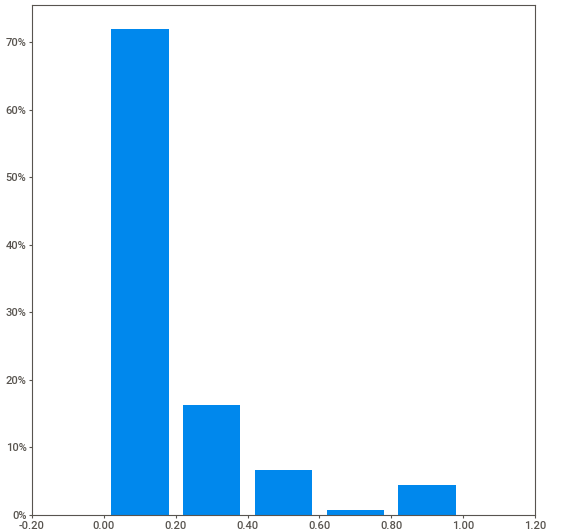
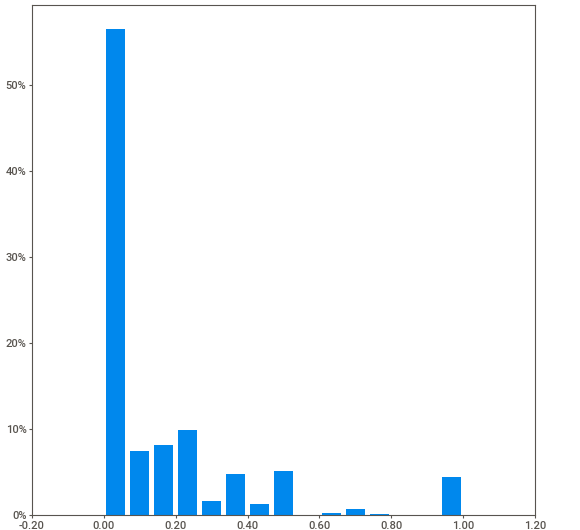
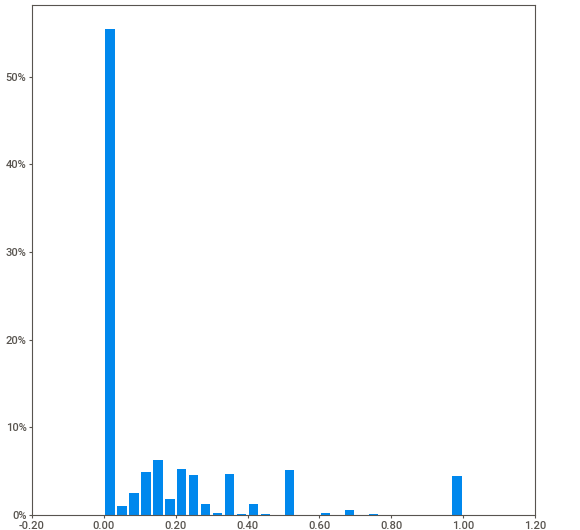
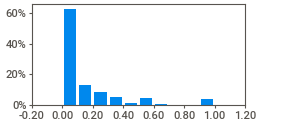
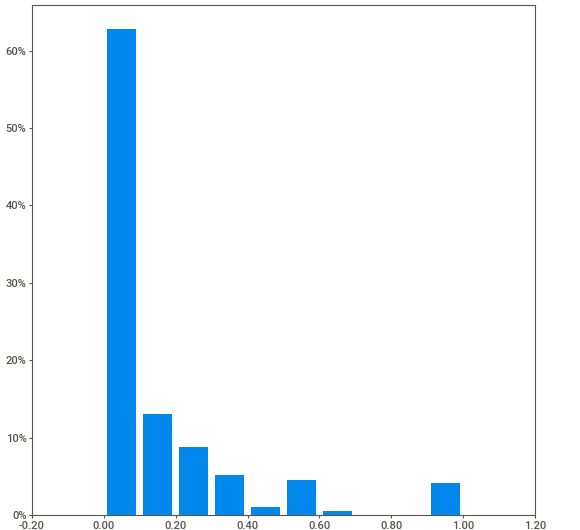
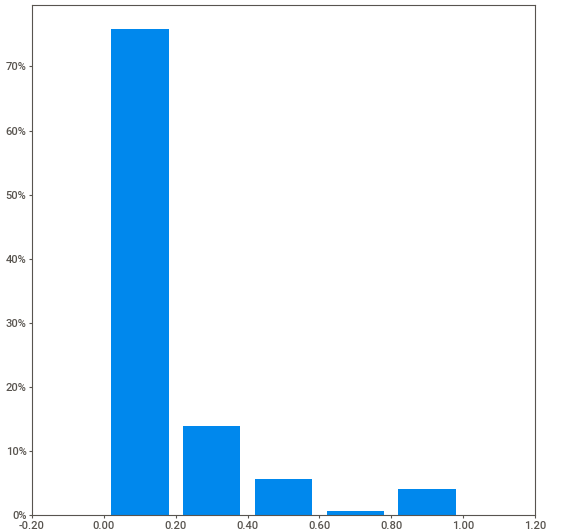
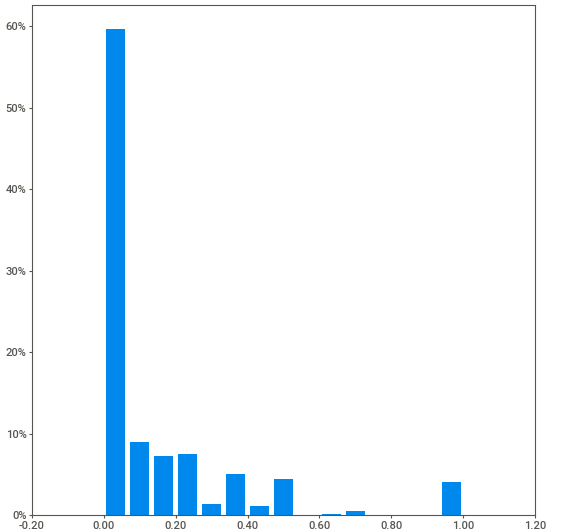
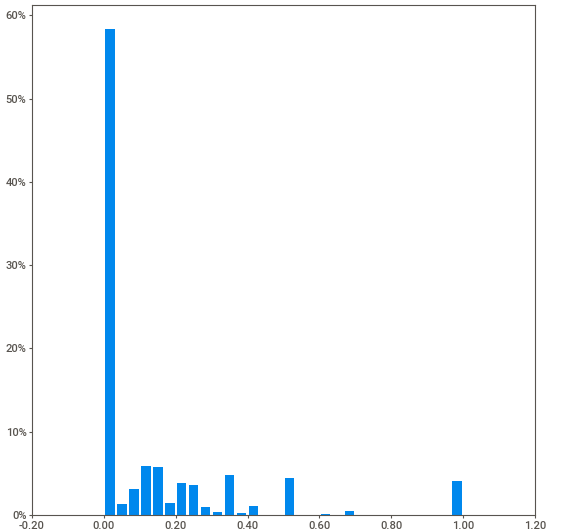
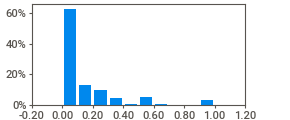
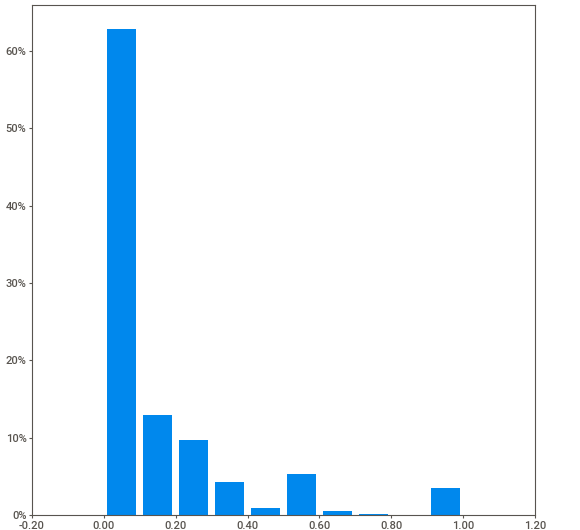
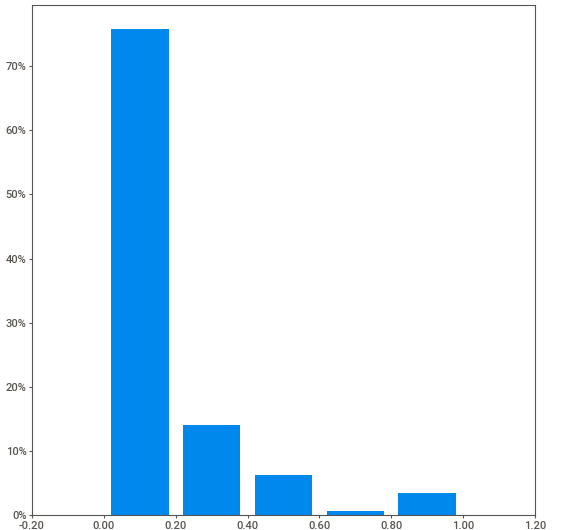
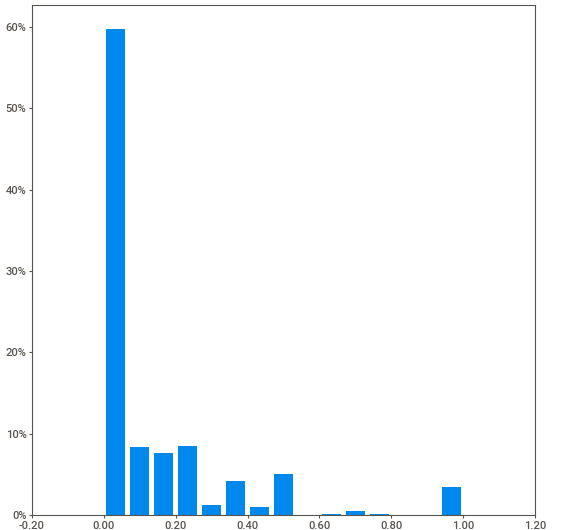
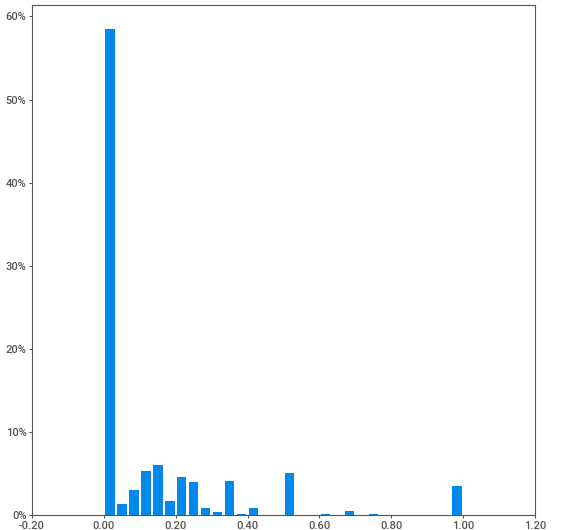
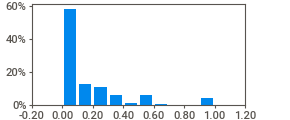
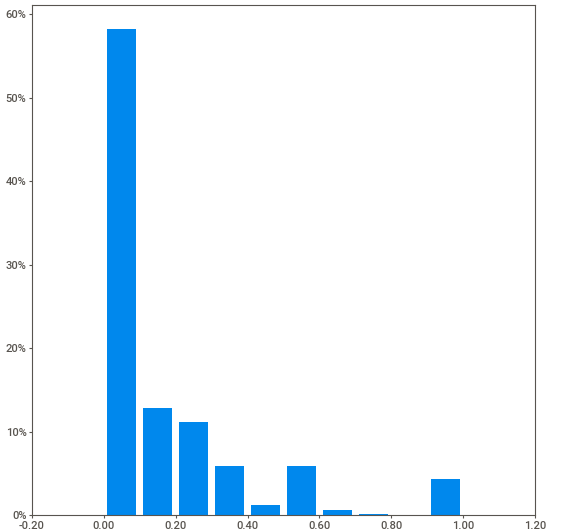
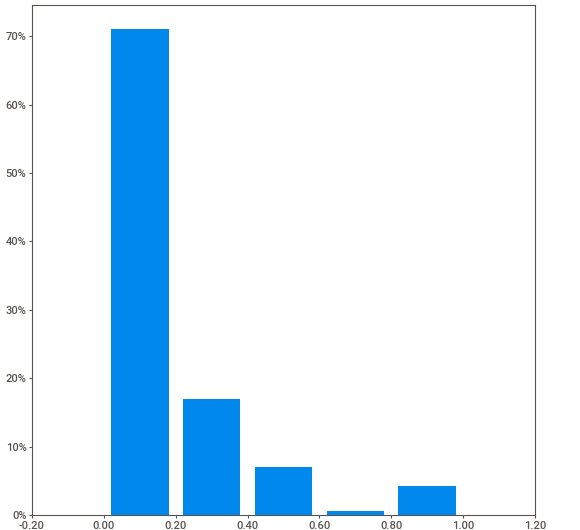
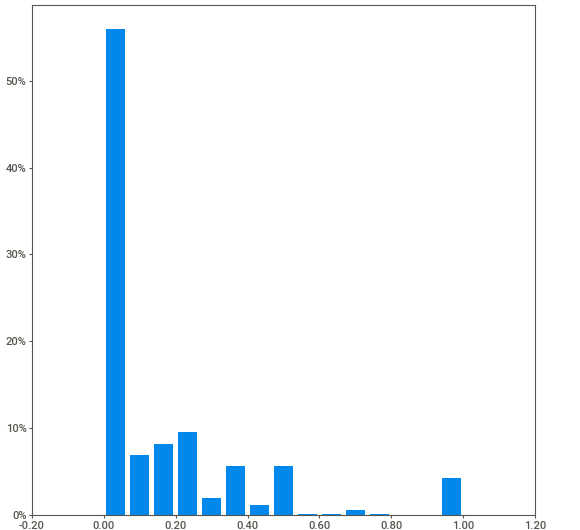
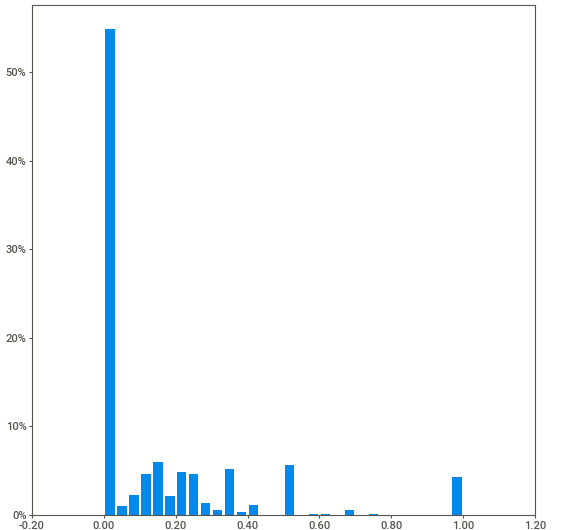
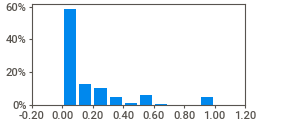
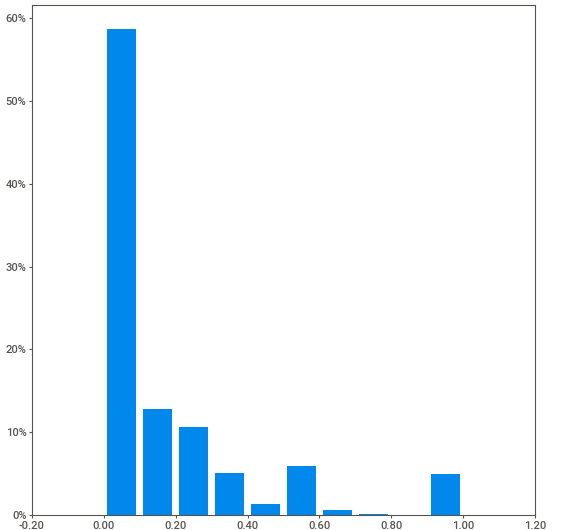
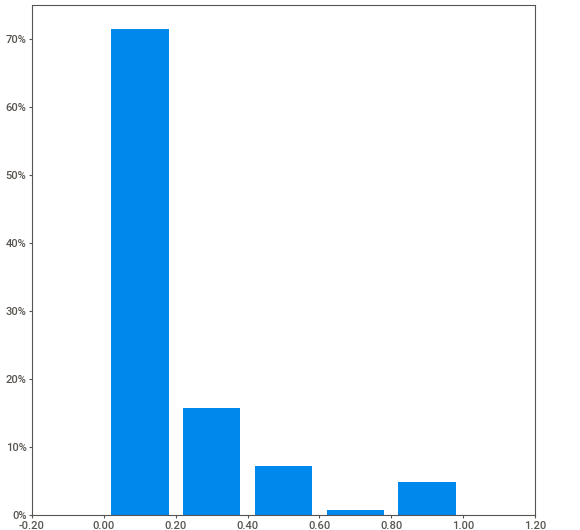
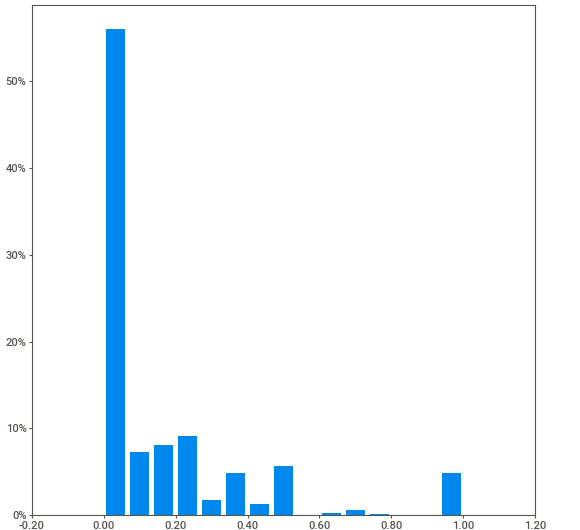
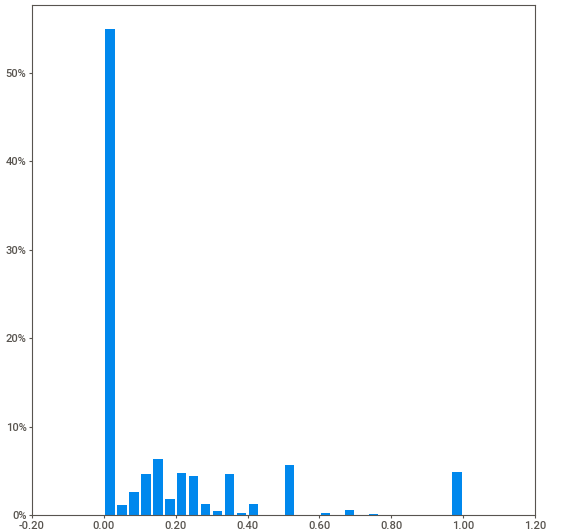
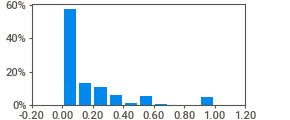
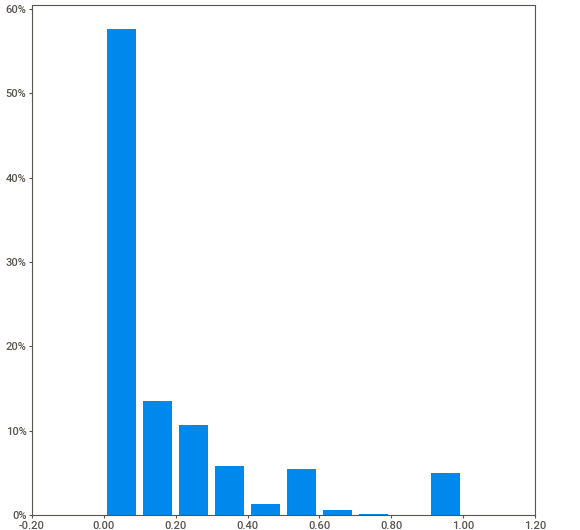
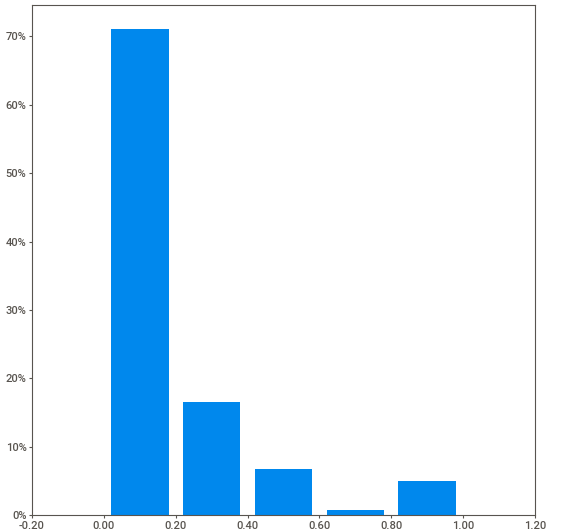
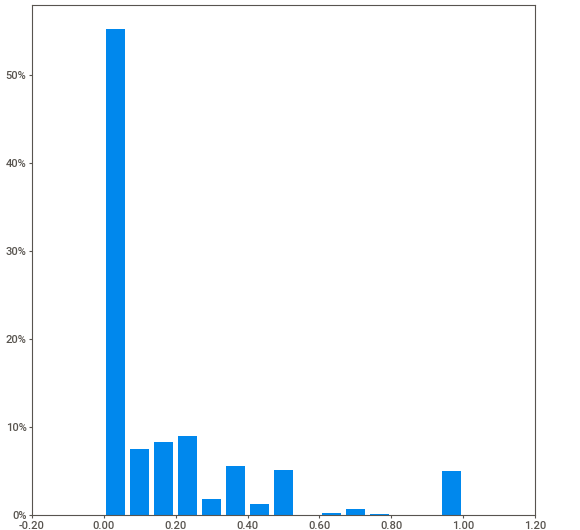
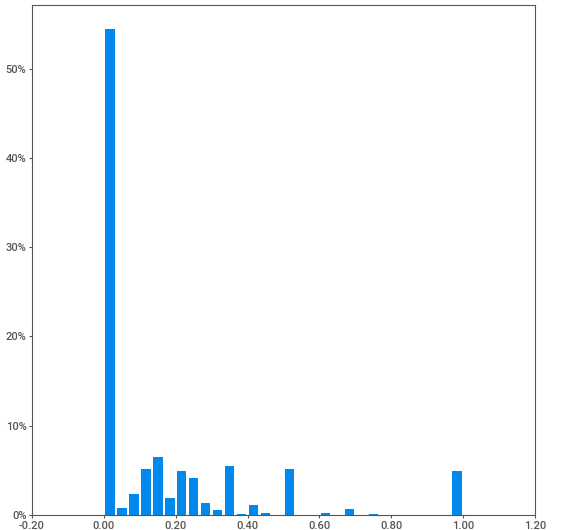
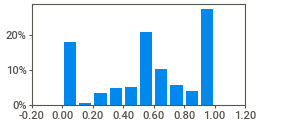
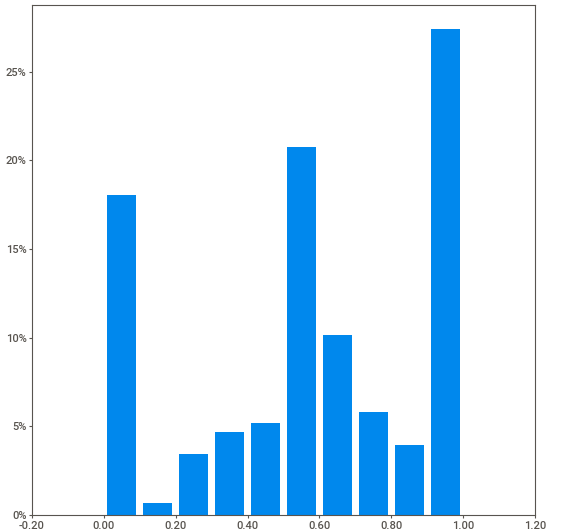
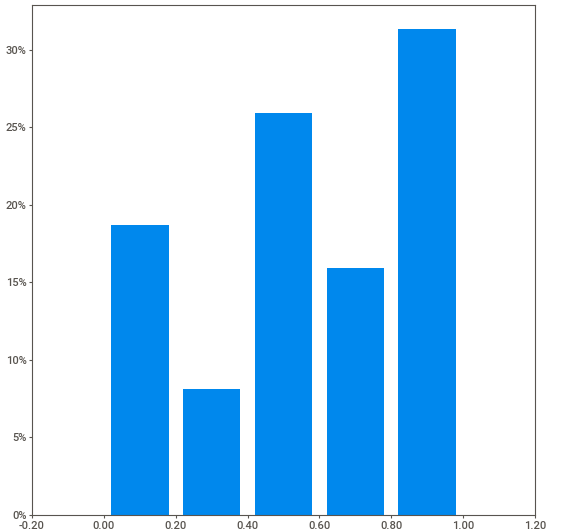
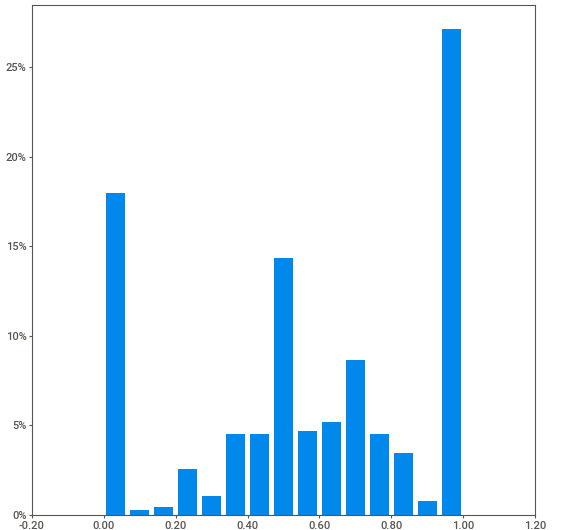
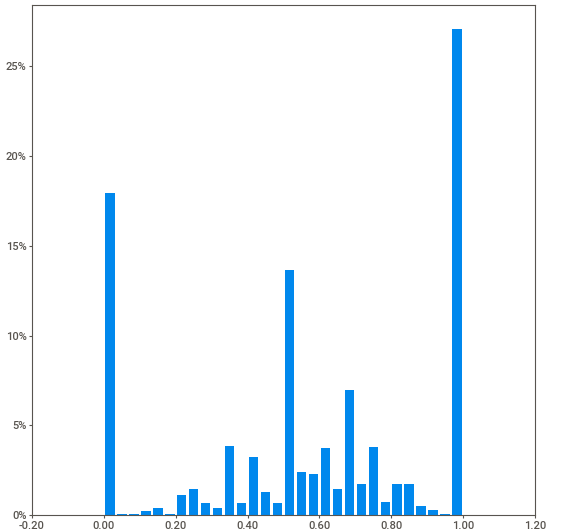
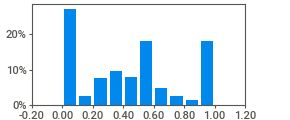
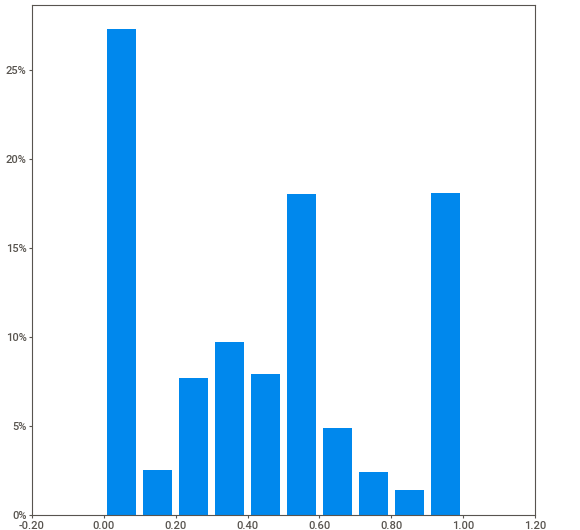
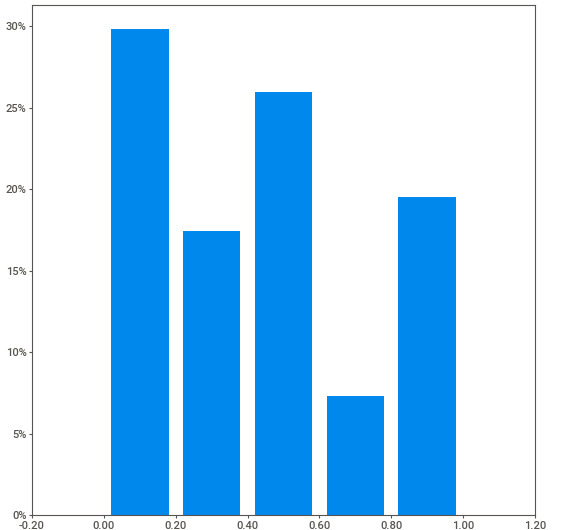
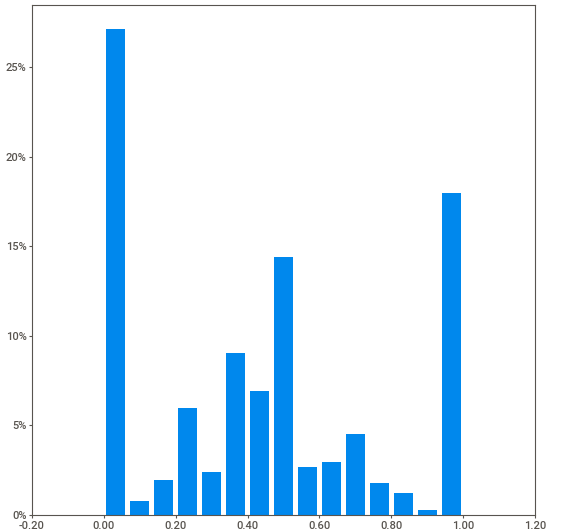
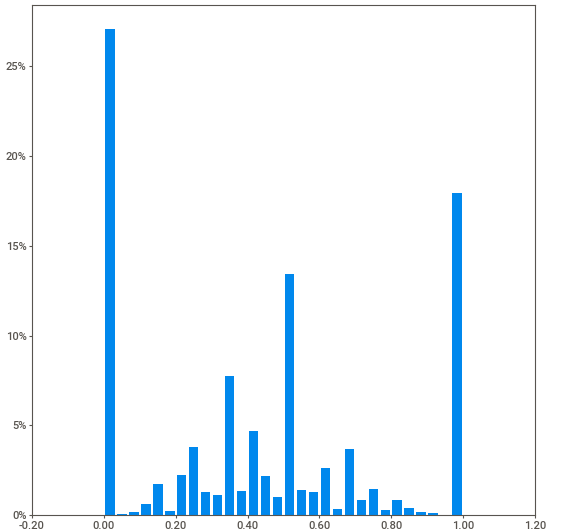
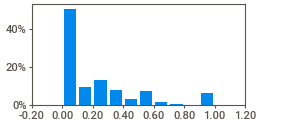
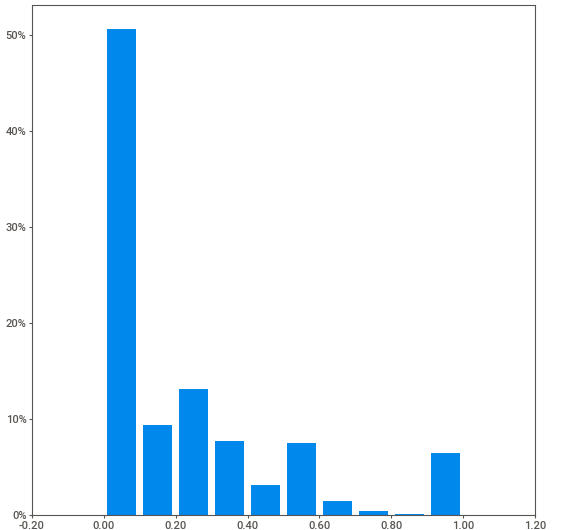
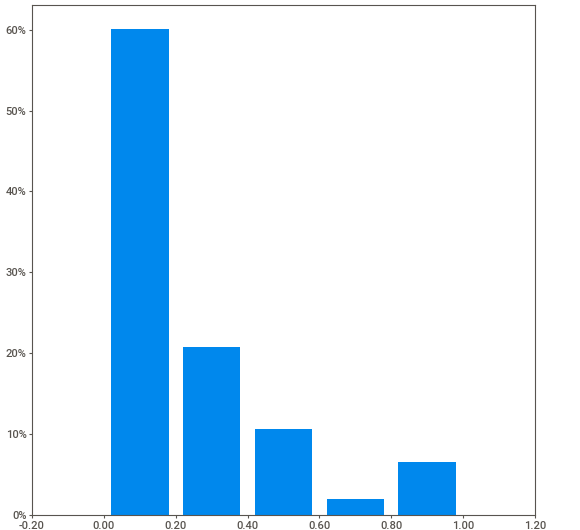
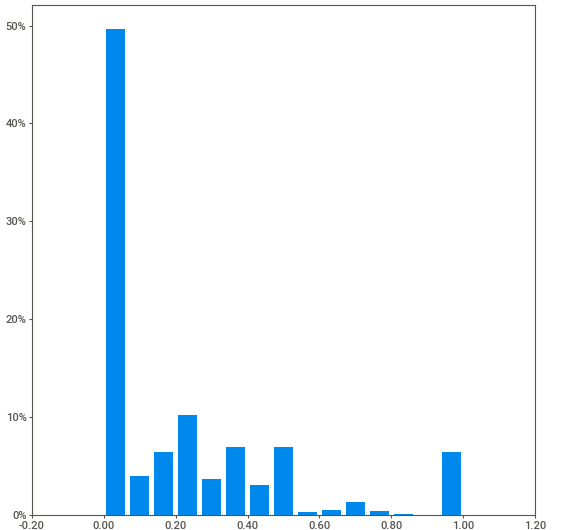
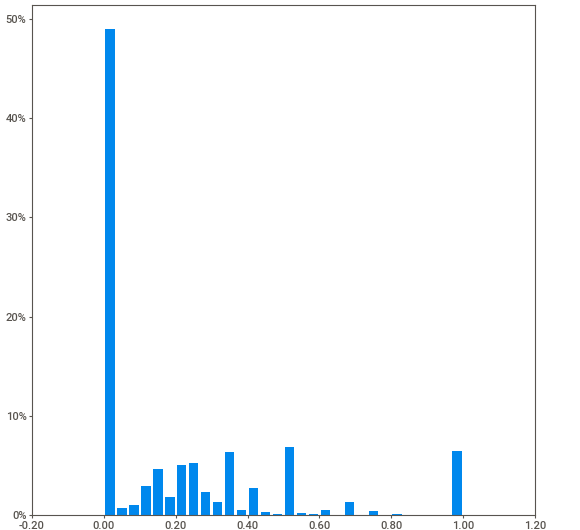
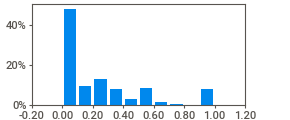
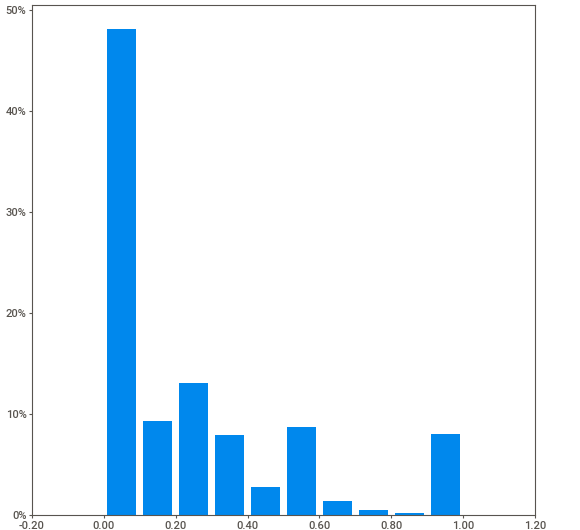
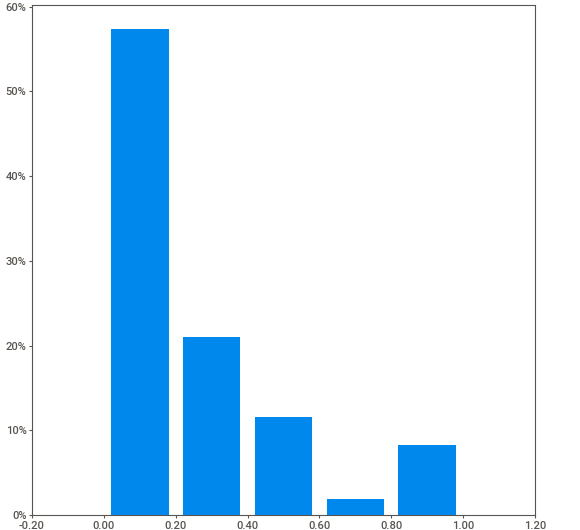
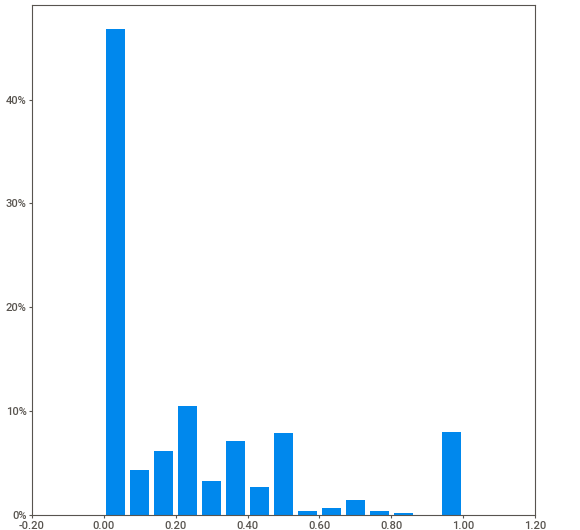
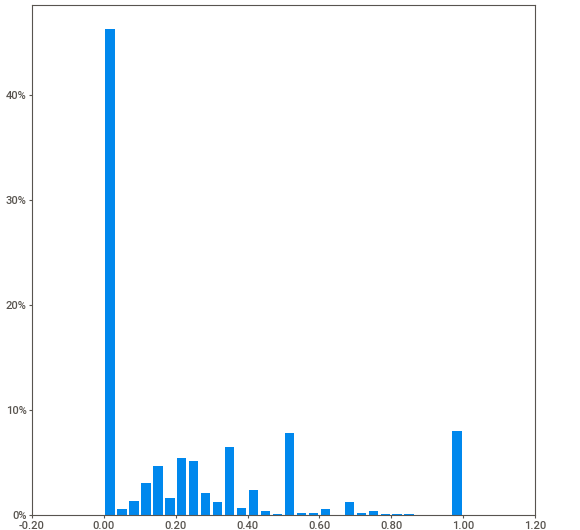
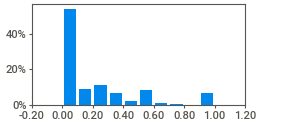
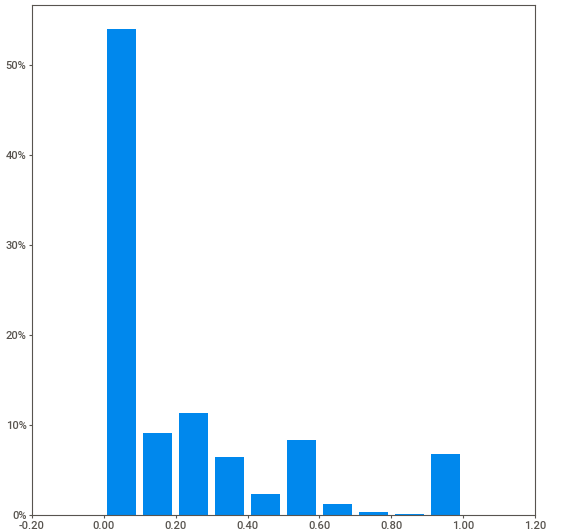
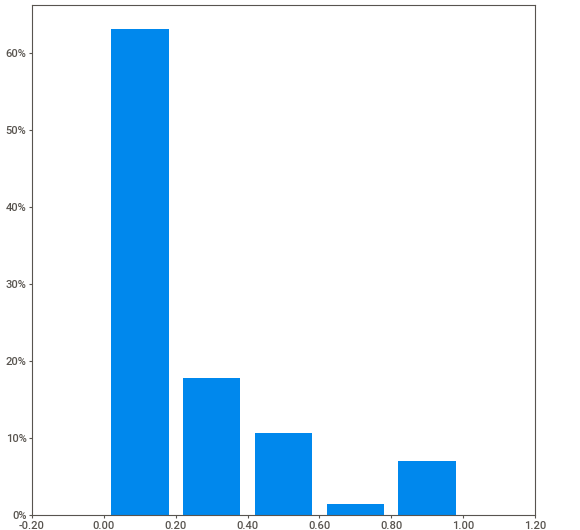
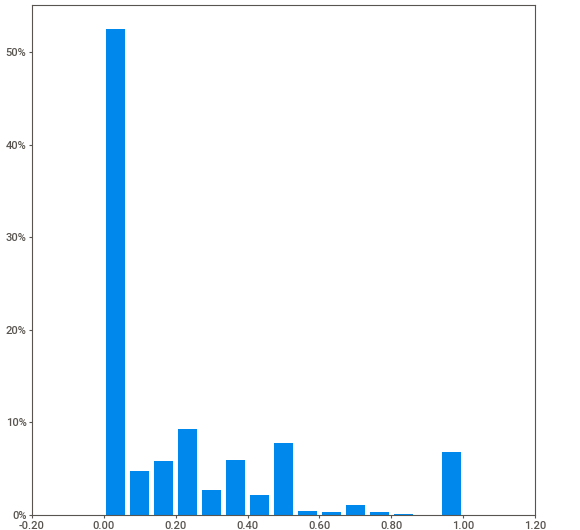
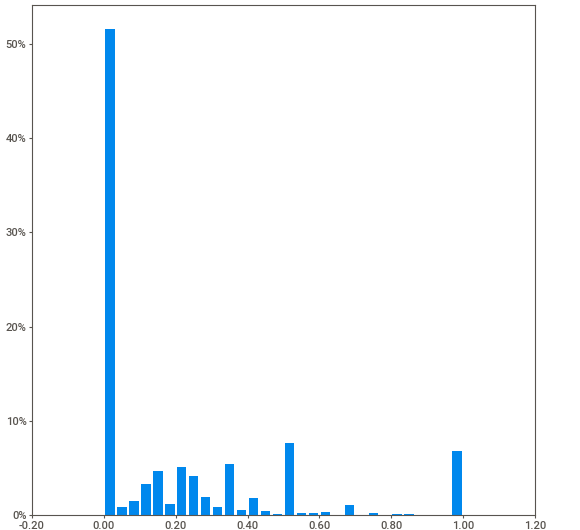
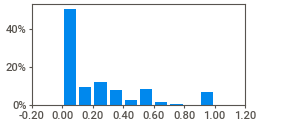
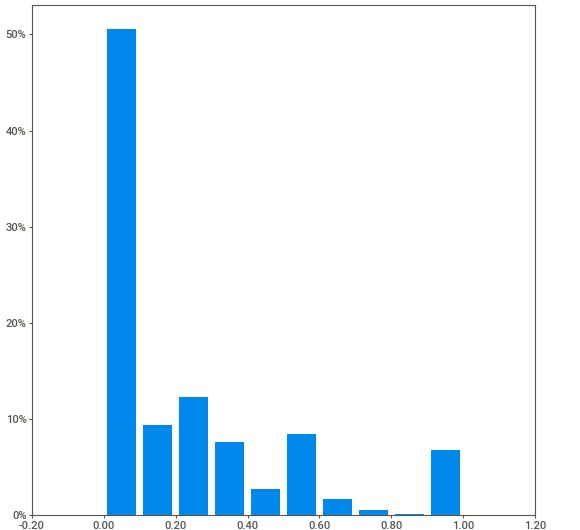
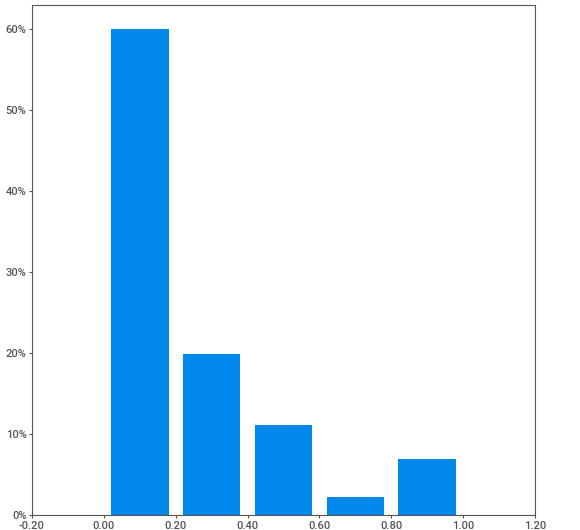
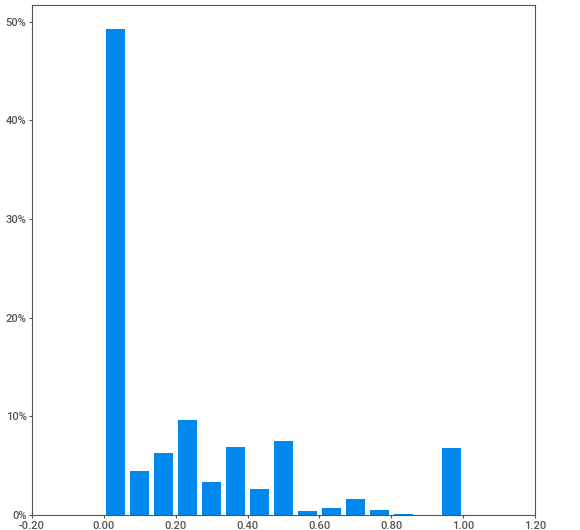
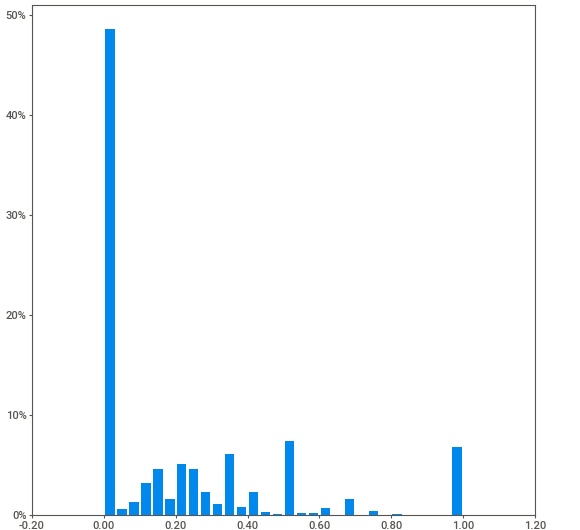
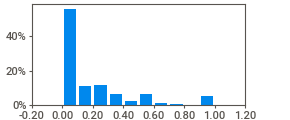
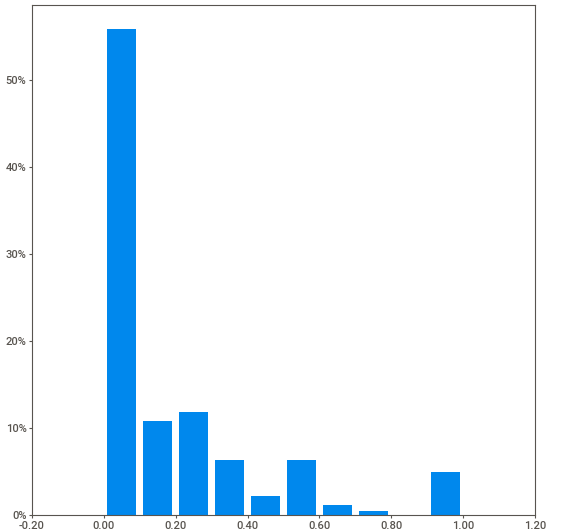
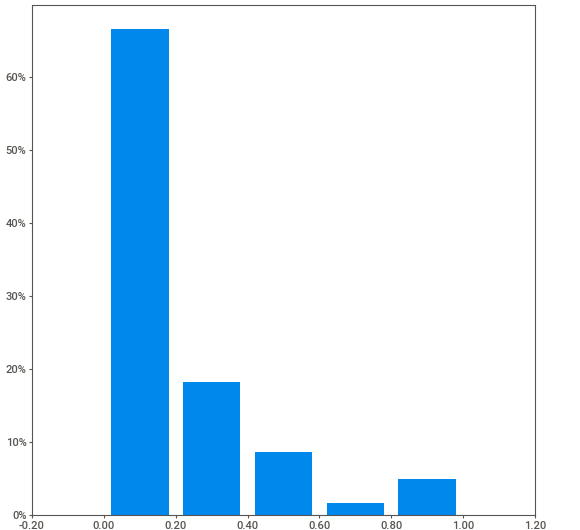
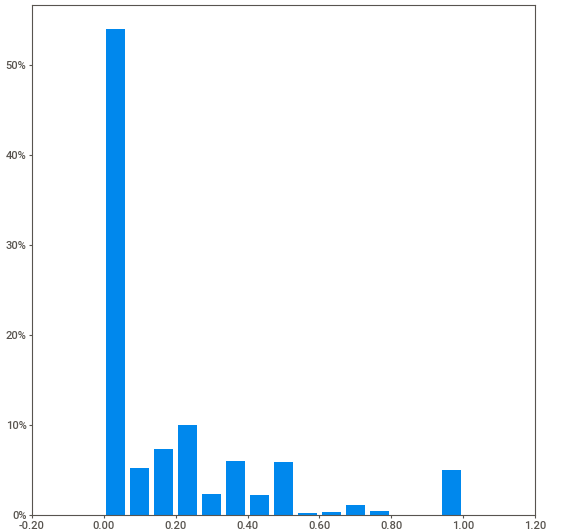
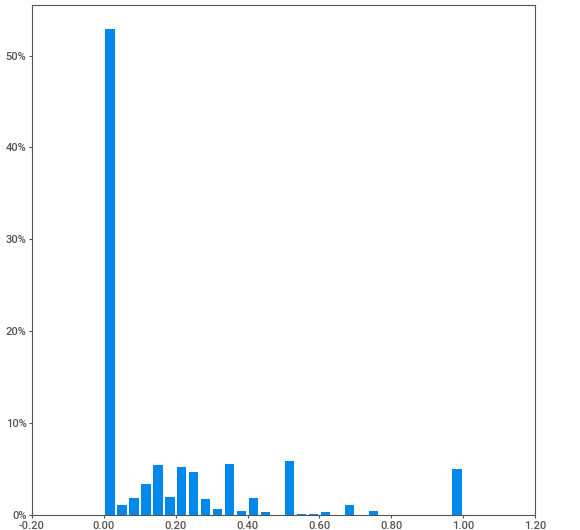
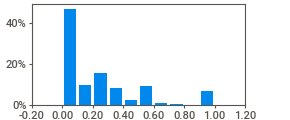
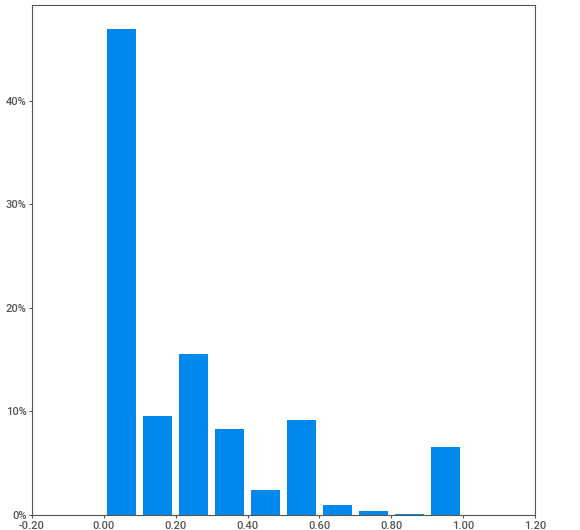
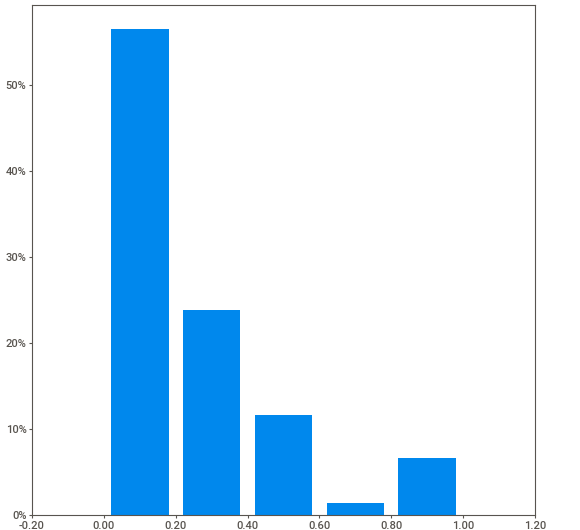
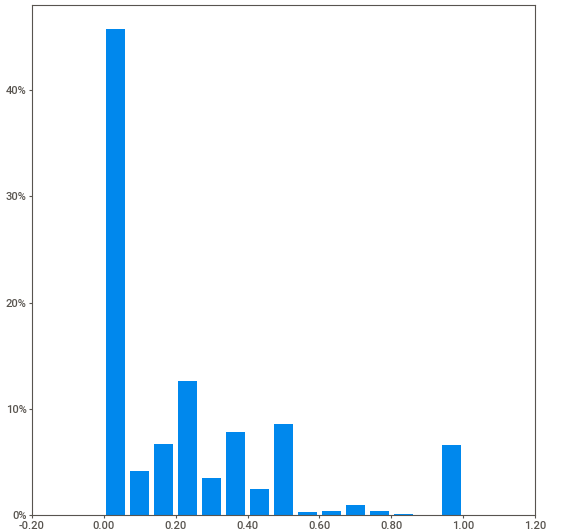
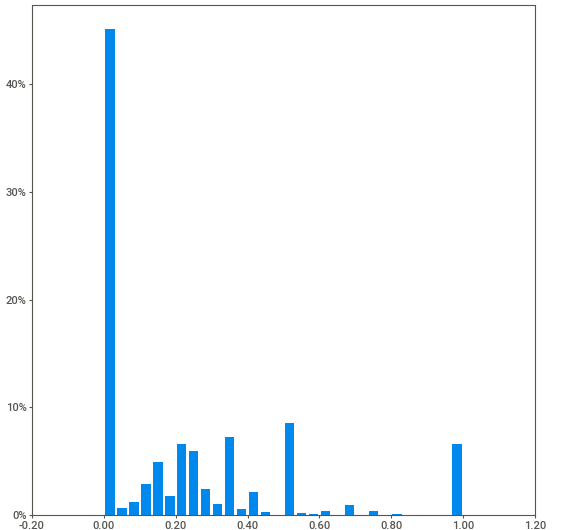
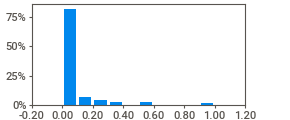
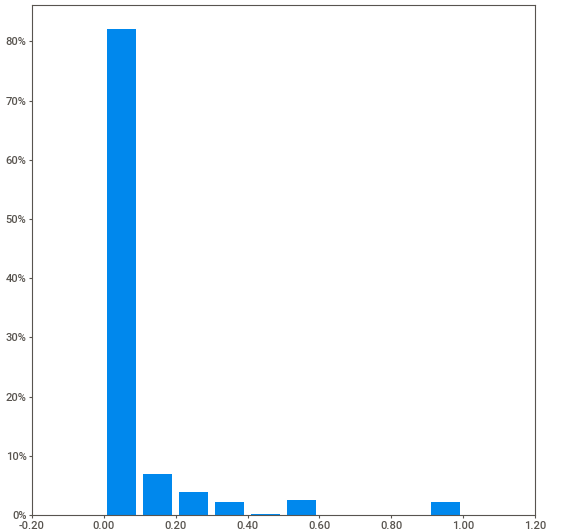
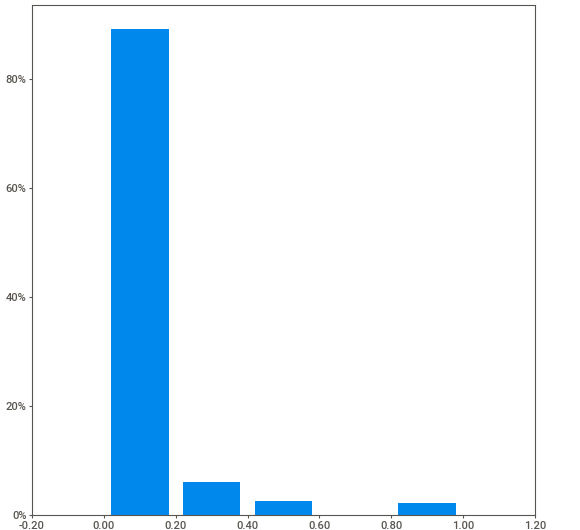
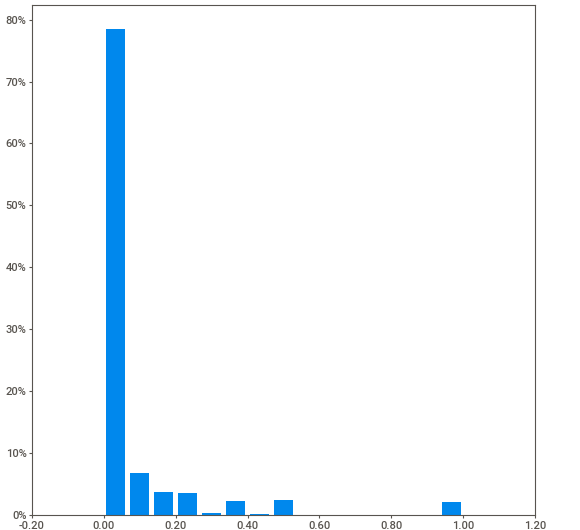
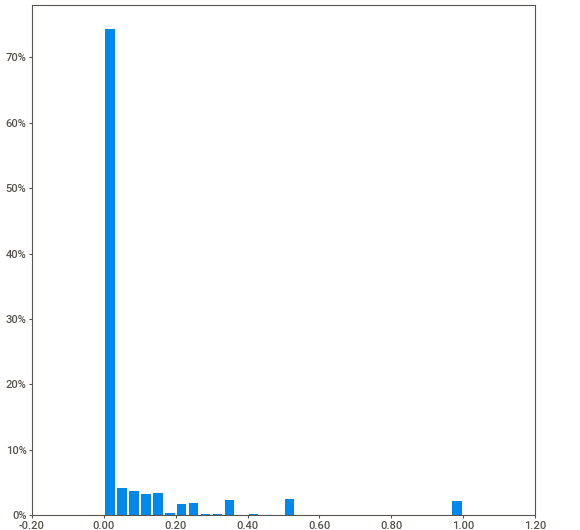
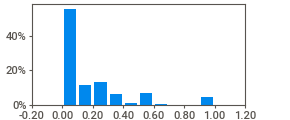
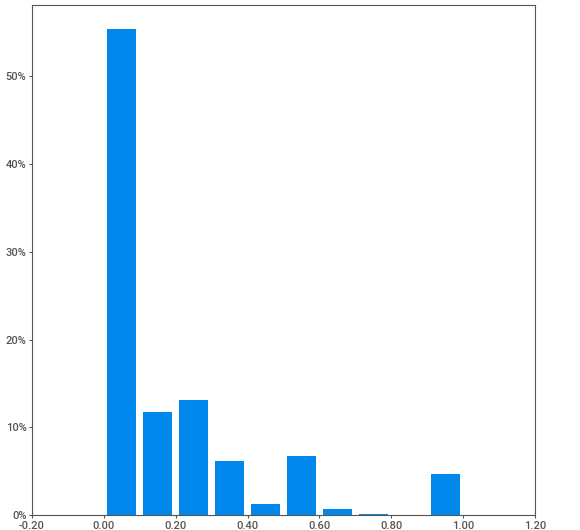
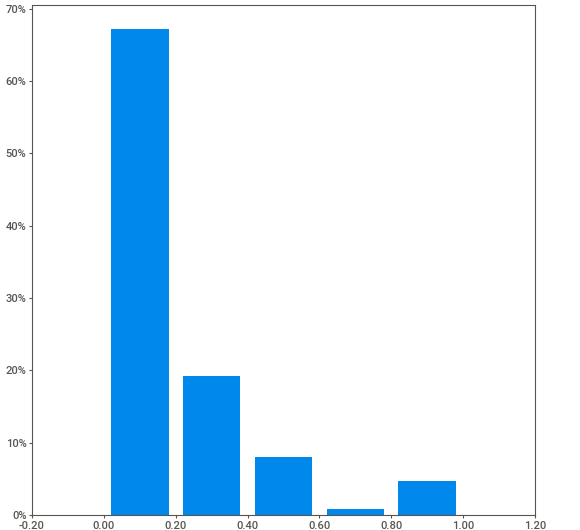
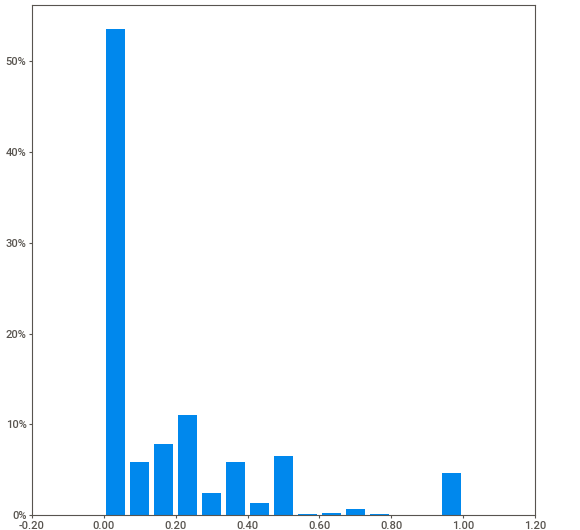
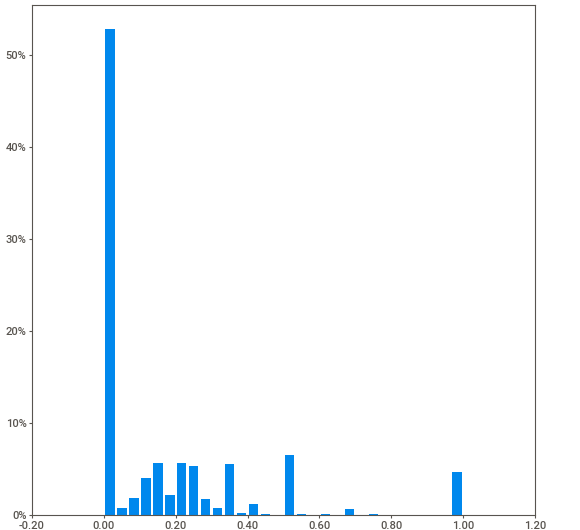
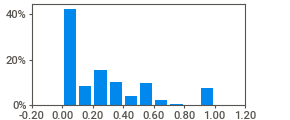
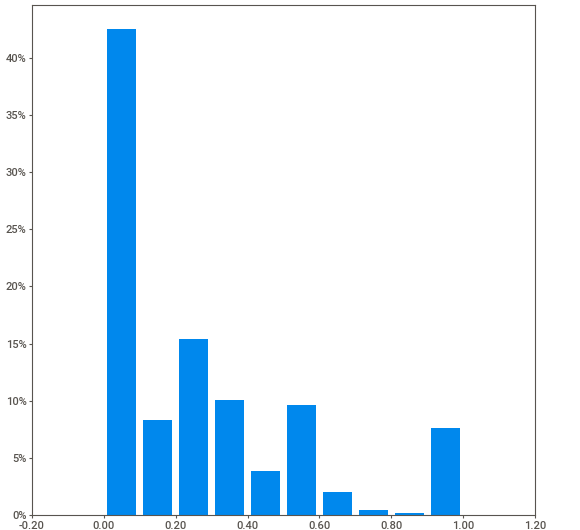
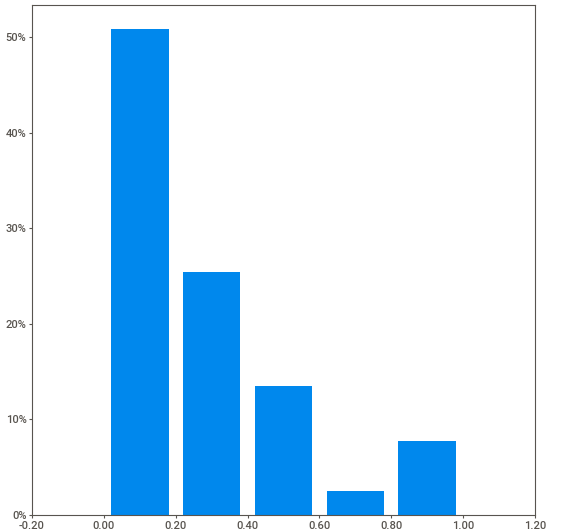
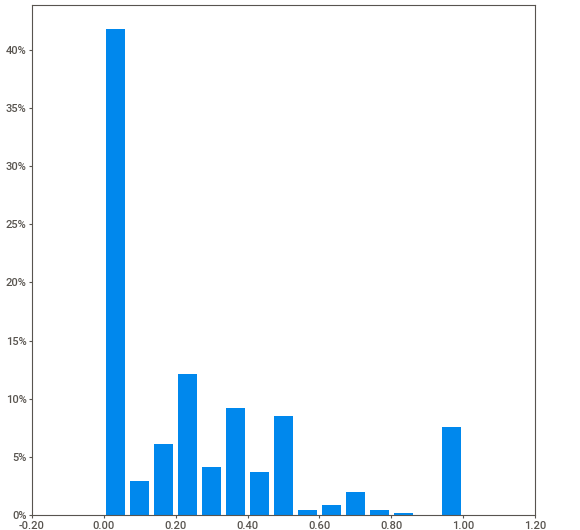
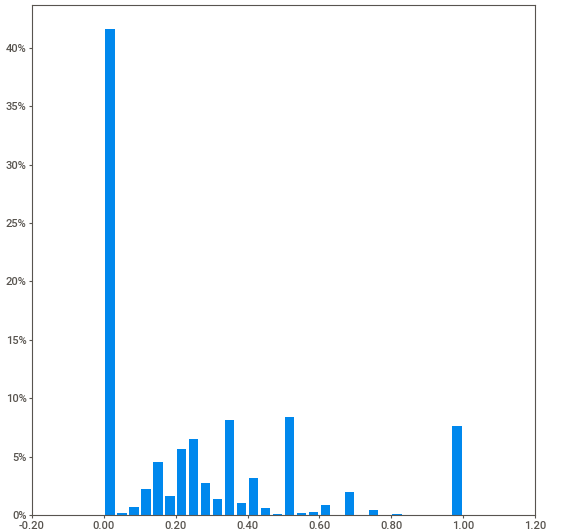
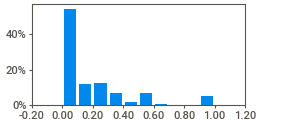
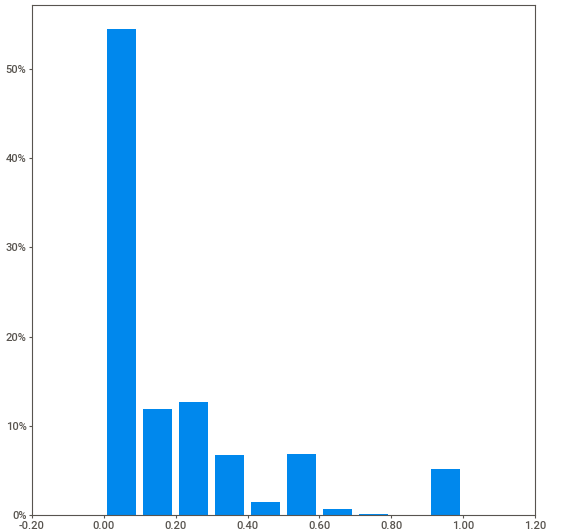
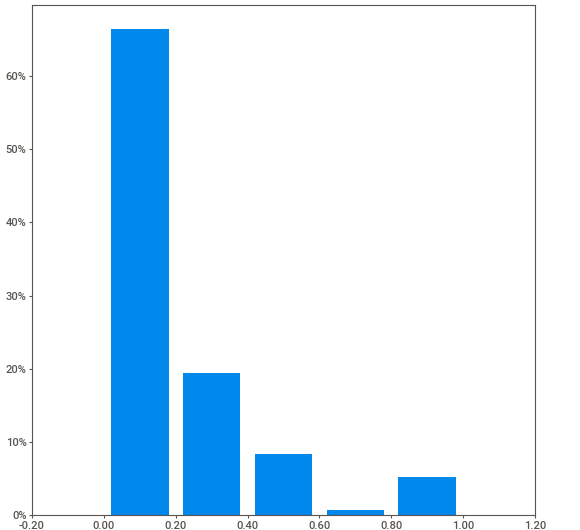
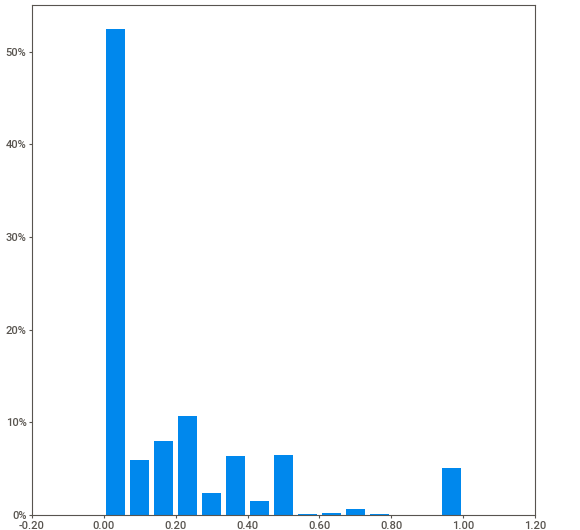
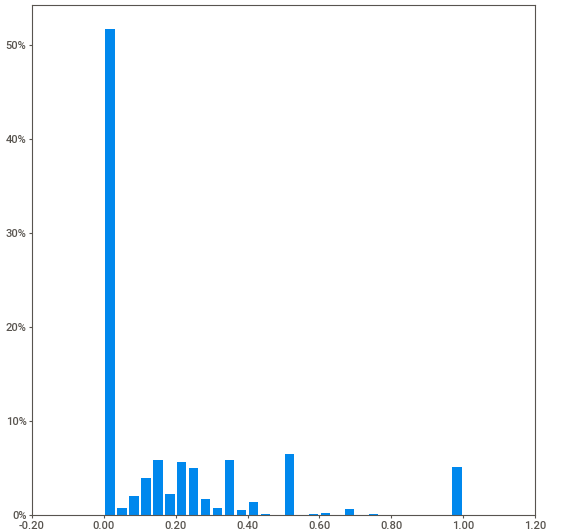
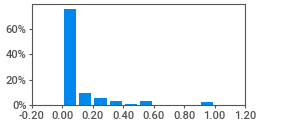
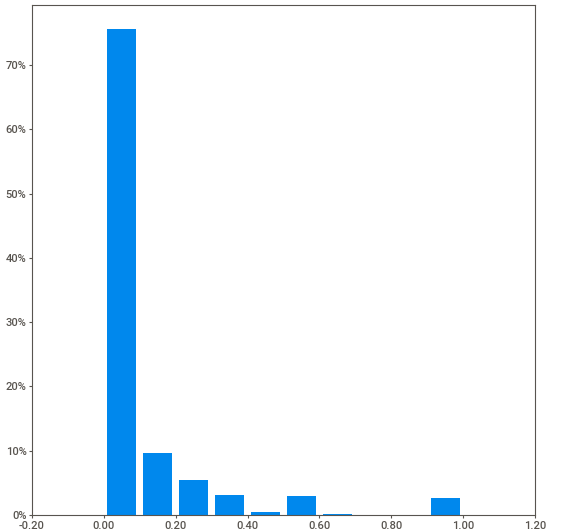
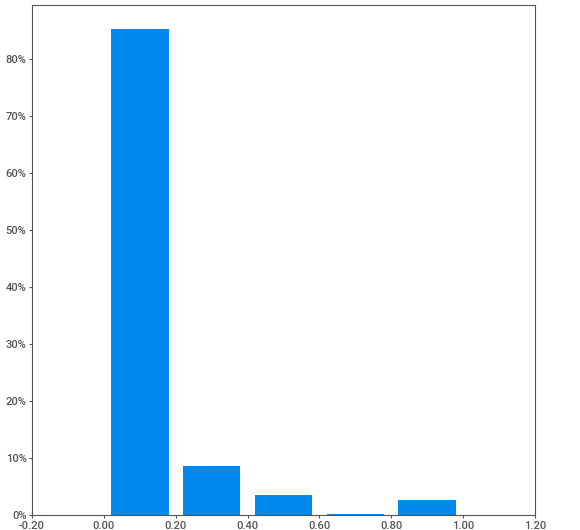
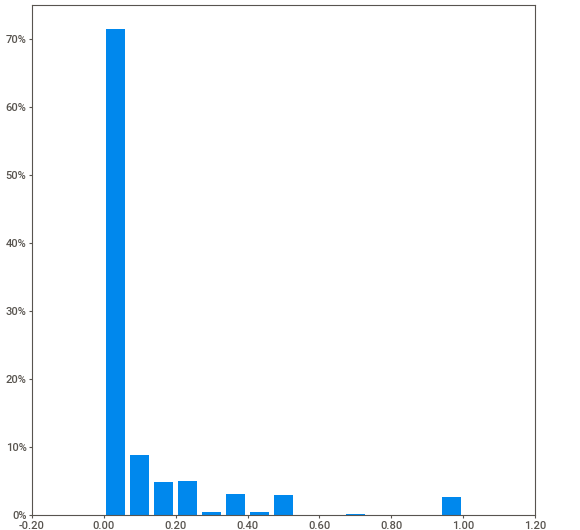
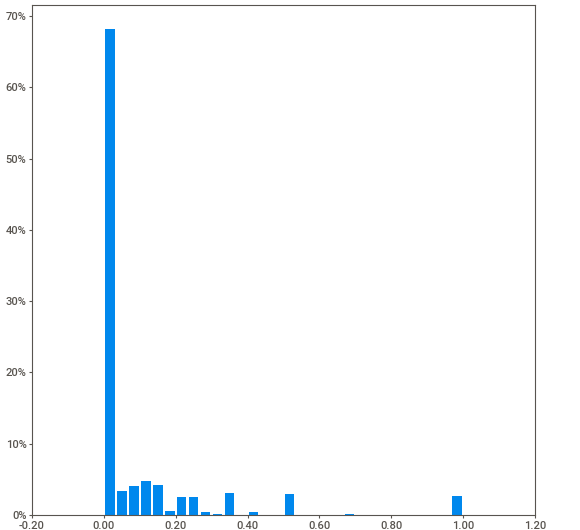
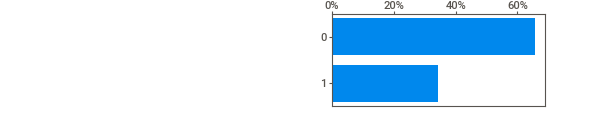
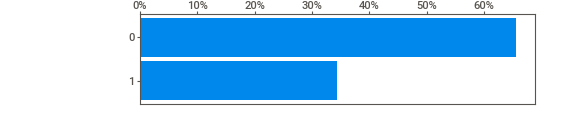
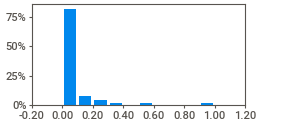
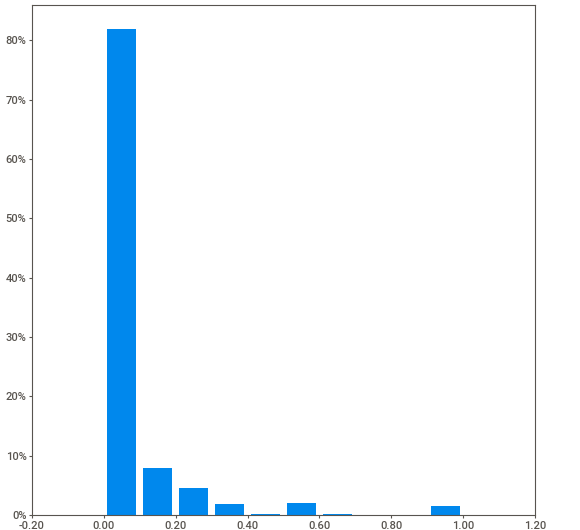
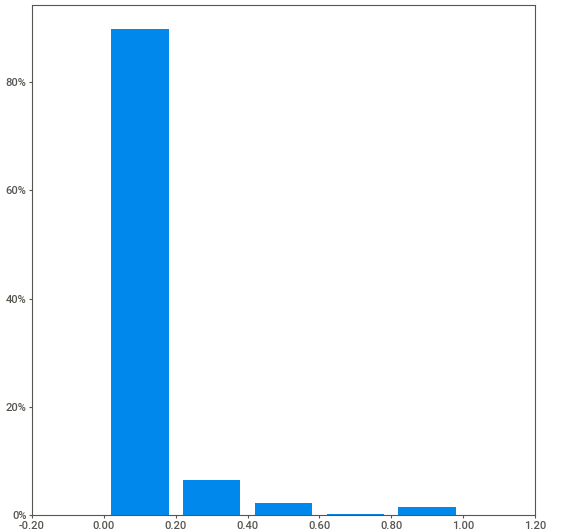
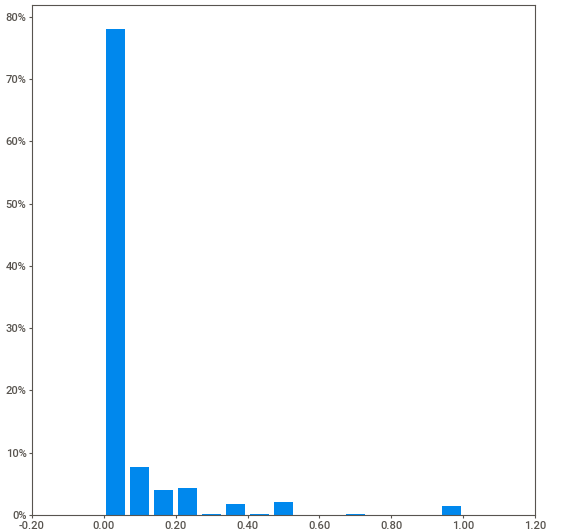
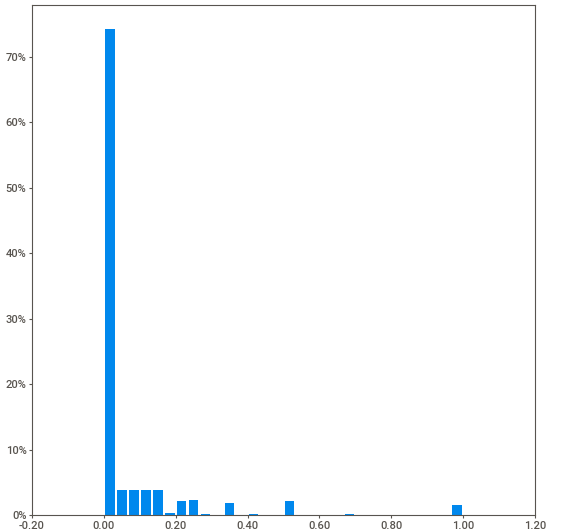
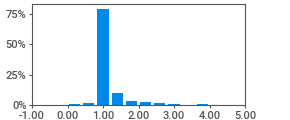
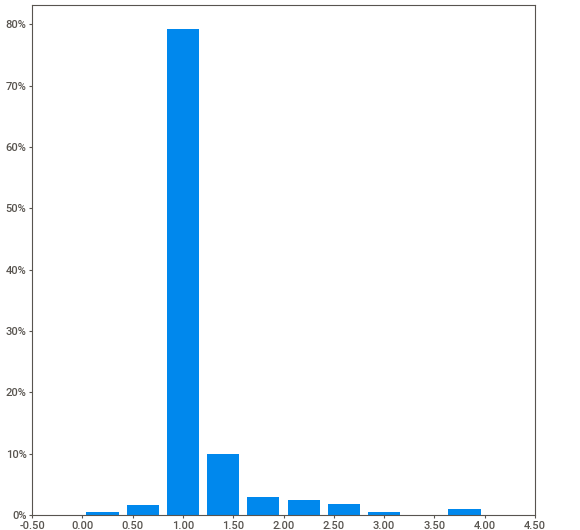
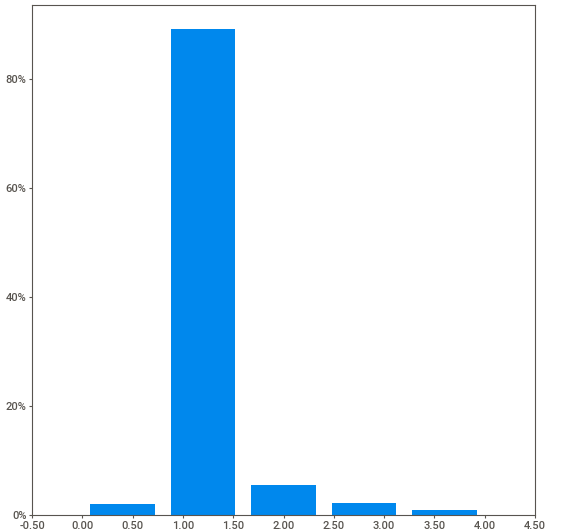
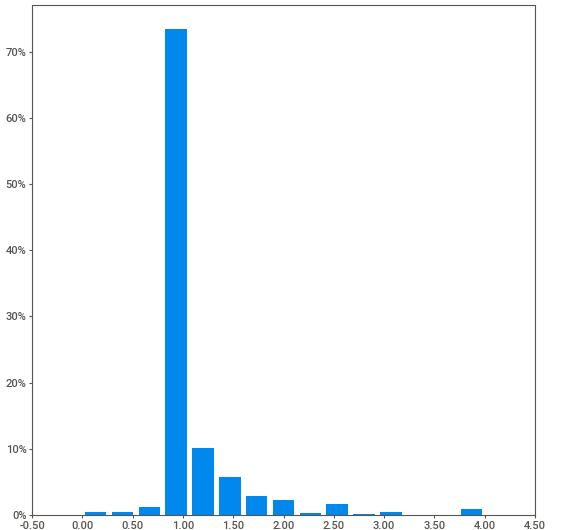
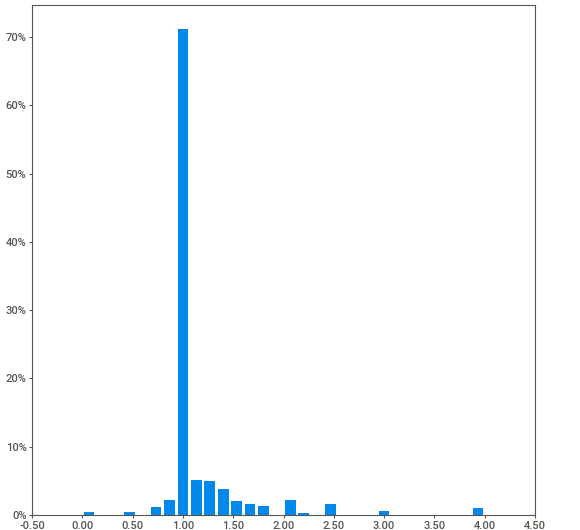
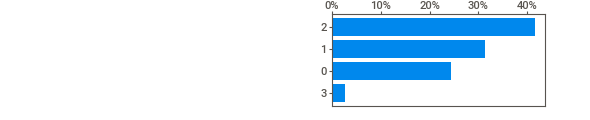
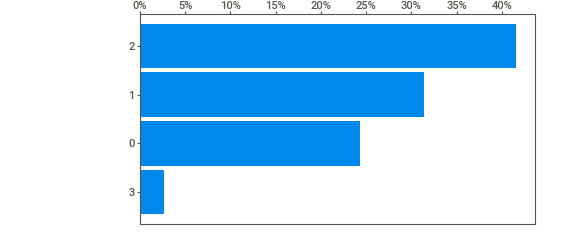
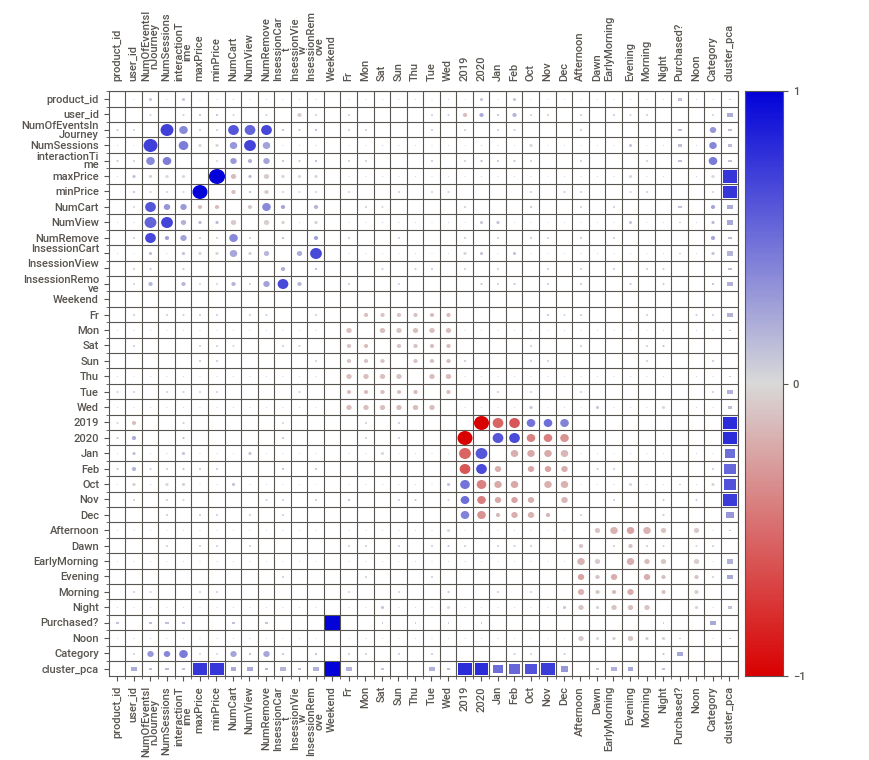
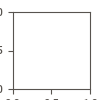

In [52]:
import sweetviz as sv

orig_data_report = sv.analyze(past)
orig_data_report.show_notebook()

Compile data for each cluster based on metric

In [98]:
metric = ['minPrice', 'maxPrice', 'Weekend', '2019', '2020', 'Nov', 'Purchased?']
metrics = {}
for m in metric:
    metrics[m] = []

for m in metric:
    for c in range(n_clusters):
        metrics[m].append(past[past.cluster_pca == c][m])

Look at boxplots of metrics vs. clusters

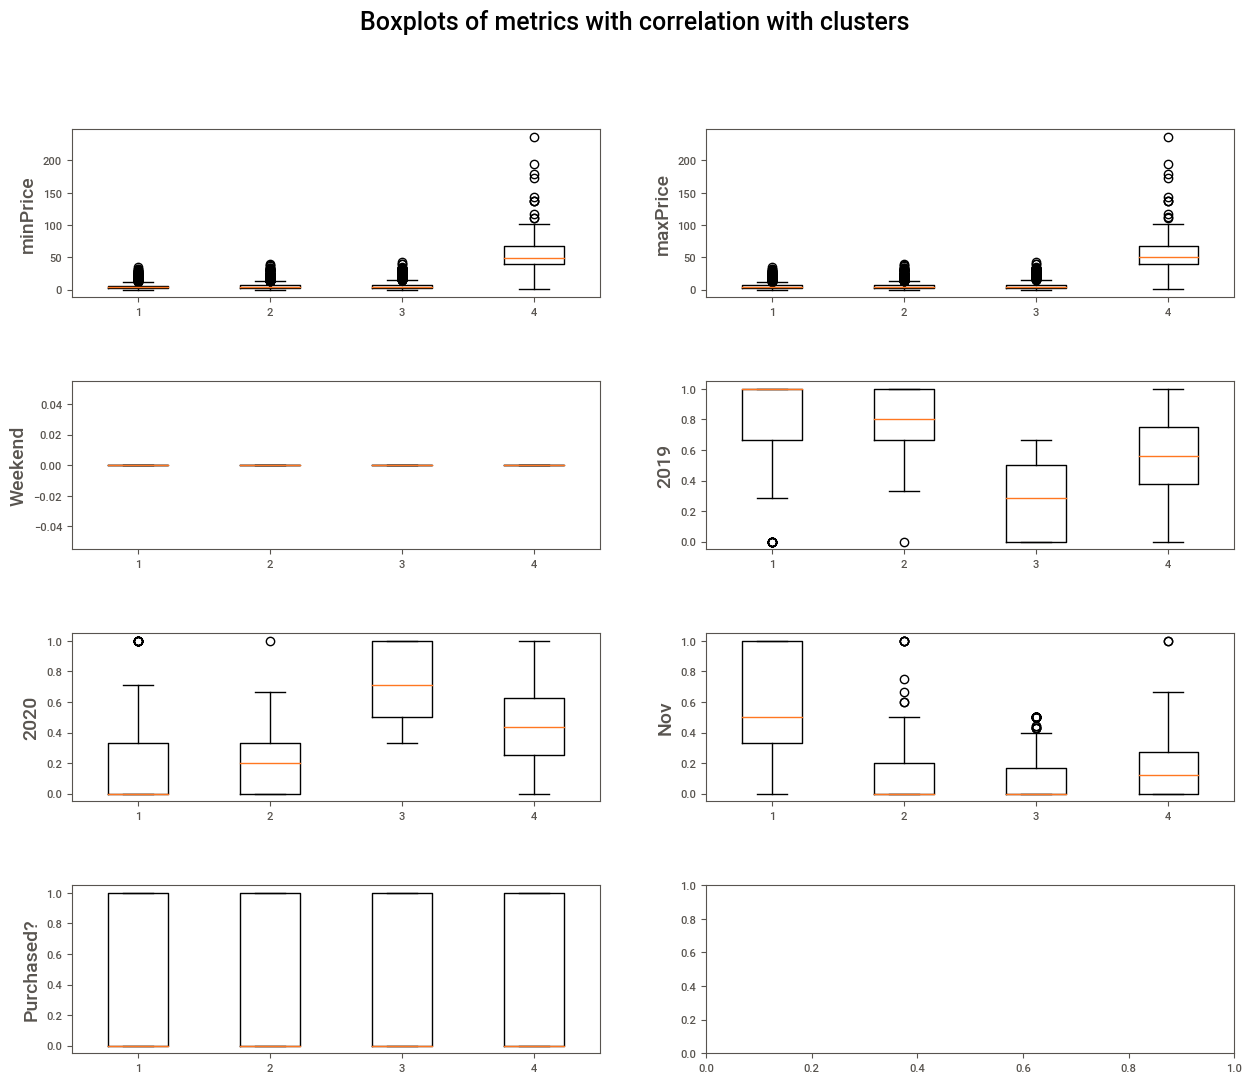

In [99]:
fig, axs = plt.subplots(nrows = 4, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
_ = fig.suptitle('Boxplots of metrics with correlation with clusters', fontsize=18);

for metric, ax in zip(metrics, axs.ravel()):
    _ = ax.boxplot(metrics[metric]);
    _ = ax.set_ylabel(metric, fontsize=14)

    Based on the associations chart, I selected variables/metrics with correlations with cluster_pca (number of clusters used in K-means). I then created boxplots to show the distributions of the chosen metrics by cluster. 
* Cluster 4 w/o conducting inferential statistics appears to be well separated from the others for min and max price. However, it is the smallest cluster (n=133), so it may not be appropriate to draw conclusions about this cluster.
* The weekend categorical variable appears to have no significance.
* There seems to be some clustering based on the year (2019 and 2020).
* Cluster 1 on average shops more in November, suggesting a cohort of holiday shoppers.

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    K-means assumes the clusters are spherical (Gaussian) and that features in a cluster are of equal variance.

In [23]:
# YOUR CODE HERE

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [100]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')

In [101]:
assert new.shape == (30091, 5)

In [102]:
new.head()

product_id   maxPrice   minPrice  Purchased?  Category
0     5866502   7.616667   7.616667           0       1.0
1     5870408   6.270000   6.270000           0       3.0
2     5900580  10.008000  10.008000           0       1.0
3     5918778   5.980000   5.980000           0       2.5
4     5848772  26.830000  26.830000           0       1.0

In [106]:
print(past.shape)
print(past.columns)
print(new.columns)

(5000, 38)
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category', 'cluster_pca'],
      dtype='object')
Index(['product_id', 'maxPrice', 'minPrice', 'Purchased?', 'Category'], dtype='object')


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

    *There are ~25k more examples in the test set vs. training and the training set has a larger feature set than the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [107]:
np.intersect1d(np.array(past.product_id), np.array(new.product_id))

array([], dtype=int64)

In [114]:
# YOUR CODE HERE
print('Number of product ids in both training and test set: {}'.format(len(np.intersect1d(np.array(past.product_id), np.array(new.product_id)))))

Number of product ids in both training and test set: 0


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [127]:
# YOUR CODE HERE # ~.344
print('Percentage of test set that resulted in purchase: {per:.1f}%'.format(per=new['Purchased?'].mean()*100))

Percentage of test set that resulted in purchase: 34.4%


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [150]:
# YOUR CODE HERE
X_train = past[list(new.columns)].drop(['product_id'], axis=1)
y_train = X_train.pop('Purchased?')

X_test = new.drop(['product_id'], axis=1)
y_test = X_test.pop('Purchased?')

In [ ]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [157]:
# YOUR CODE HERE
# Make pipeline
lrpip = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
# Fit pipeline
lrpip.fit(X_train, y_train)
# Predict on test set
y_pred = lrpip.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [161]:
# YOUR CODE HERE
X = pd.concat([X_train, X_test])

In [162]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [178]:
# YOUR CODE HERE
y_ones = pd.Series(np.zeros(len(X_test), dtype=int) - 1)
y = pd.concat([y_train, y_ones])

In [179]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [194]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading

ls = LabelSpreading(kernel='knn', alpha=0.01)
ls.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [198]:
semi_sup_preds = ls.transduction_


In [206]:
semi_sup_preds = semi_sup_preds[5000:]

In [207]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [209]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.80      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.81      0.77      0.79     30091
weighted avg       0.82      0.82      0.81     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



    *The accuracy and the F1 score for the positive (1) class increased. This is likely due to 'increasing' the amount of data available for training with label spreading.*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)